# Univariate analysis of house prices dataset
In the following notebook we're going to analyse what numerical features the original dataset contains and what are their distributions


In [48]:
# import dataset and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.plotting.register_matplotlib_converters()
plt.rc('figure', figsize=(16, 6))


orig_data = pd.read_csv("data/train.csv", index_col="Id")


In [2]:
# copying the dataset for analysis
house_data = orig_data.copy()
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# checking missing values in each column
missing_val_count_by_column = (house_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [12]:
# checking size of dataset
house_data.shape

(1460, 80)

From above we see that most columns contain all or most of the data. Some columns which have enormous amount of missing data are "PoolQC", 'Fence', "MiscFeature", "Alley" and also "FireplaceQu". 

Even though the large amount of data is missing these columns can still be valuable as e.g. lack of column "PoolQC" might mean that specific house didn't have a pool at all instead of any error being committed. That is also confirmed by data_description.txt file.

Next we will choose target (column "SalePrice") from the set of features:

In [24]:
Y = house_data["SalePrice"]
X = house_data.drop(['SalePrice'], axis=1)

Let's check which variables are numerical and which are objects.

This will be useful to determine what visual techniques to use.

In [119]:
num_cols = list(X.select_dtypes(include=[np.number]).columns.values)
object_cols = list(set(X.columns) - set(num_cols))
print(f"Object columns: {object_cols} \n")
print(f"Numerical columns: {num_cols}")

Object columns: ['PavedDrive', 'Exterior1st', 'GarageType', 'LotConfig', 'BsmtFinType2', 'BsmtFinType1', 'MiscFeature', 'LandSlope', 'HeatingQC', 'PoolQC', 'SaleCondition', 'SaleType', 'BldgType', 'BsmtCond', 'BsmtExposure', 'LandContour', 'Neighborhood', 'Alley', 'RoofStyle', 'ExterCond', 'Electrical', 'Foundation', 'Utilities', 'Street', 'ExterQual', 'BsmtQual', 'GarageCond', 'Exterior2nd', 'Condition1', 'CentralAir', 'FireplaceQu', 'RoofMatl', 'HouseStyle', 'Fence', 'LotShape', 'Functional', 'GarageQual', 'GarageFinish', 'Heating', 'MSZoning', 'MasVnrType', 'KitchenQual', 'Condition2'] 

Numerical columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',

By manually checking every column we can define sets of numerical and categorical variables:

In [64]:
categorical_features = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", 
                        "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", 
                        "OverallCond", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", 
                        "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                        "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", 
                        "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", 'PoolQC', 'Fence', 
                        'MiscFeature', 'SaleType', 'SaleCondition']

numerical_features = ["LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", 
                      "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", 
                      "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", 'Fireplaces', 
                      "GarageYrBlt", "GarageCars", "GarageArea", 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                      'ScreenPorch', 'PoolArea', "MiscVal", 'MoSold', 'YrSold']

Let's define helper functions to help with plotting relevant graphs:

In [113]:
def plot_numerical_feature(feature, include_non_positive=True):
    plot_column = X[feature]
    if not include_non_positive:
        plot_column = plot_column[plot_column > 0]
    
    print(f"Description of {feature}")
    print(plot_column.describe(), "\n")
    print(f"Histogram of {feature}")
    plt.figure()
    sns.histplot(data=plot_column)
    plt.show()
    print(f"Kernel density estimation plot of {feature}")
    plt.figure()
    sns.kdeplot(data=plot_column, shade=True)
    plt.show()
    print(f"Box plot of {feature}")   
    plt.figure()
    sns.boxplot(x=plot_column)
    plt.show()

def plot_categorical_feature(feature):
    print(f"Total count: {len(X[feature])}")
    print("The frequency table:")
    print(X[feature].value_counts()/len(X[feature]), "\n")
    print(f"Bar chart of {feature}")
    plt.figure()
    sns.barplot(x=sorted(np.unique(X[feature])), y=X[feature].value_counts().sort_index())
    plt.show()

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

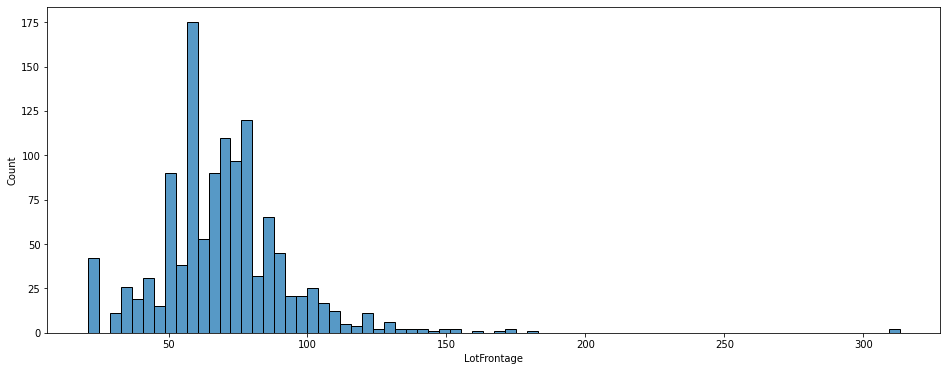

In [49]:
sns.histplot(data=X["LotFrontage"])

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

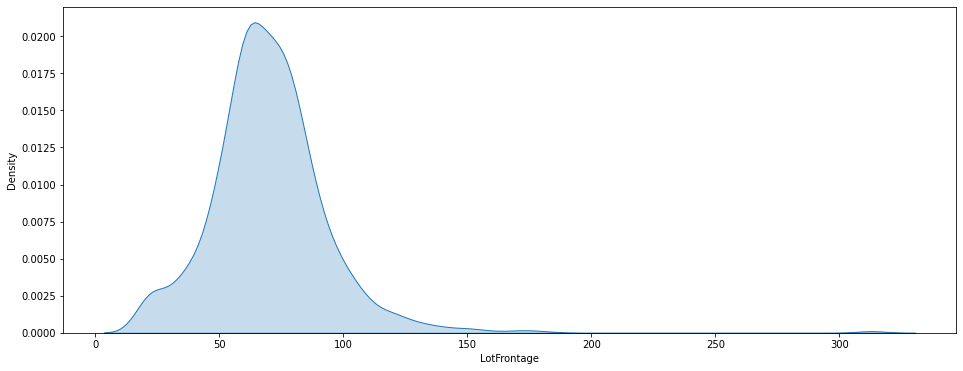

In [50]:
sns.kdeplot(data=X["LotFrontage"], shade=True)

<AxesSubplot:xlabel='LotFrontage'>

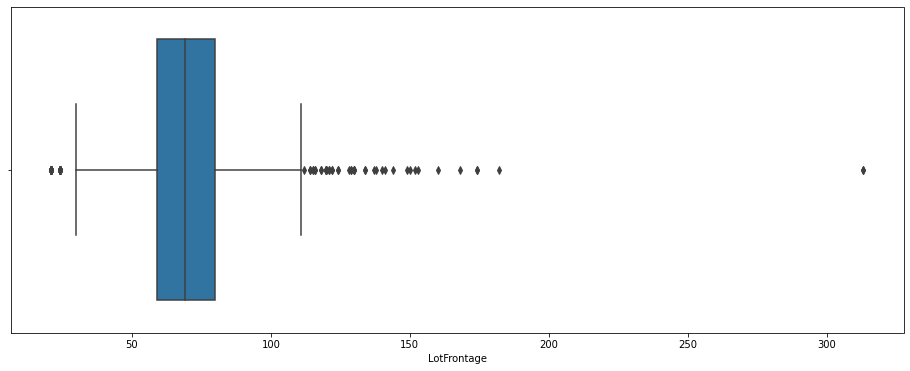

In [51]:
sns.boxplot(x=X["LotFrontage"])

In [46]:
X["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

We see that data has a slightly skewed distribution to the right with couple of outliers to the right. Most of the data (50%) is within (59, 80) interval.

Now let's check LotArea

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

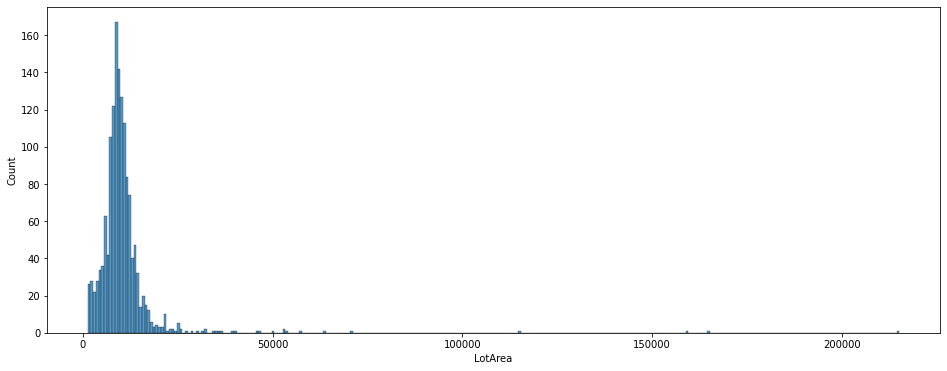

In [53]:
plot_feature = "LotArea"
sns.histplot(data=X[plot_feature])

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

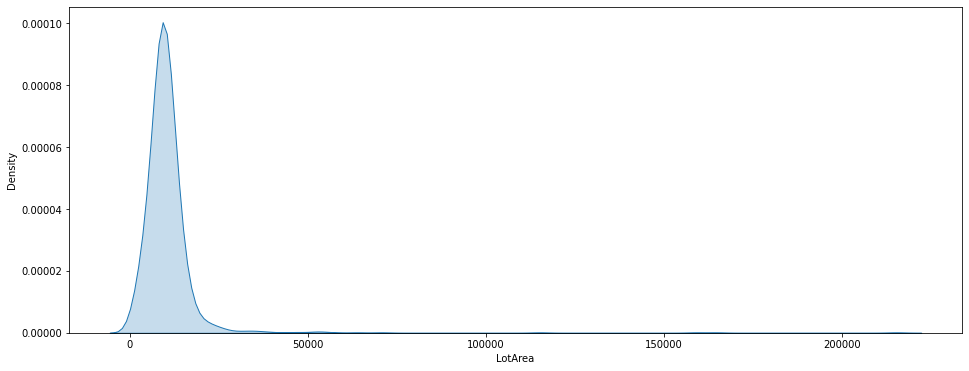

In [54]:
sns.kdeplot(data=X[plot_feature], shade=True)

<AxesSubplot:xlabel='LotArea'>

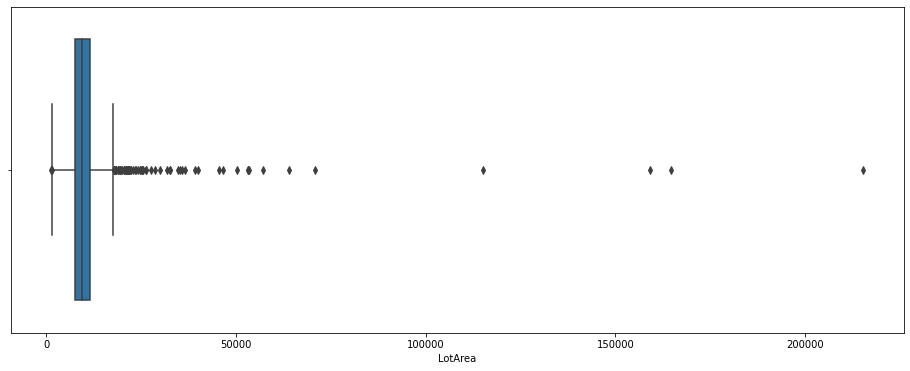

In [55]:
sns.boxplot(x=X[plot_feature])

In [57]:
X[plot_feature].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

Distribution is very similar to LotFrontage but with much more outliers

Let's now check the "YearBuilt" variable

Description of YearBuilt
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64 

Histogram of YearBuilt


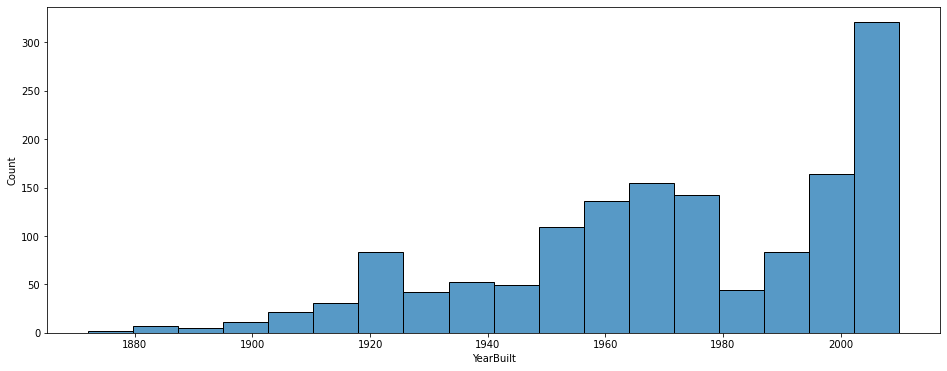

Kernel density estimation plot of YearBuilt


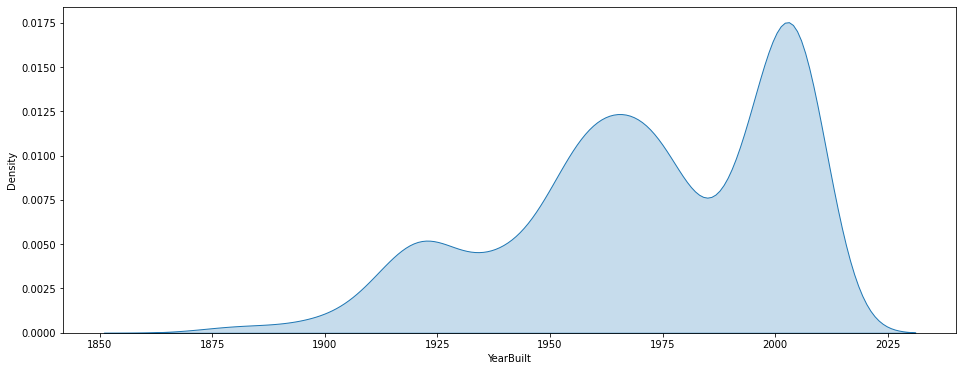

Box plot of YearBuilt


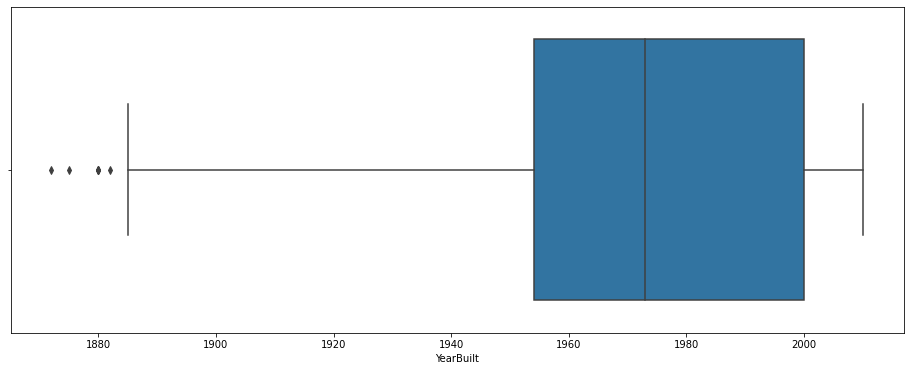

In [114]:
plot_numerical_feature("YearBuilt")

There seems to three important periods in which most of the houses were built: 1920s, 1960s-1970s and 2010s as seen on histogram and kernel density estimation plot. As seen on the box plot, the interquartile range is very large. There are also very few outliers in the variable with oldest buildings being from around 1872.

(TODO): investigate further this cumulation of houses between three different periods

Next let's look at "YearRemodAdd" which is the remodel date:

Description of YearRemodAdd
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64 

Histogram of YearRemodAdd


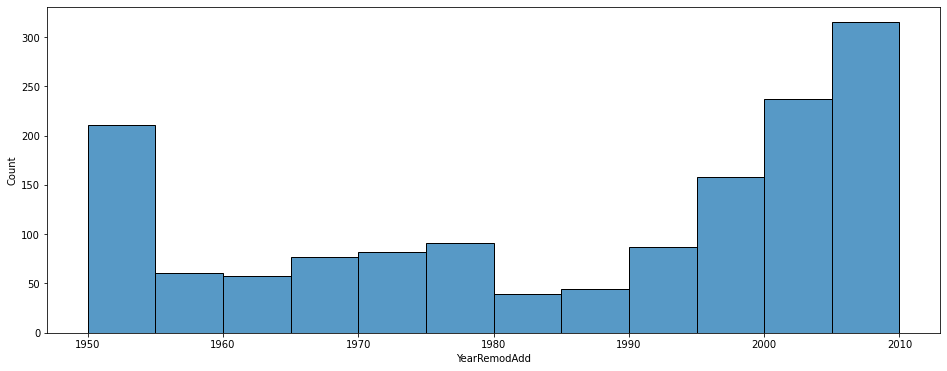

Kernel density estimation plot of YearRemodAdd


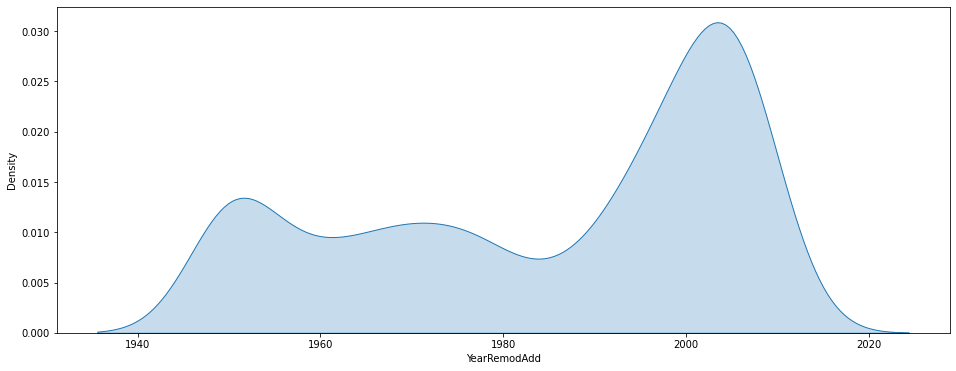

Box plot of YearRemodAdd


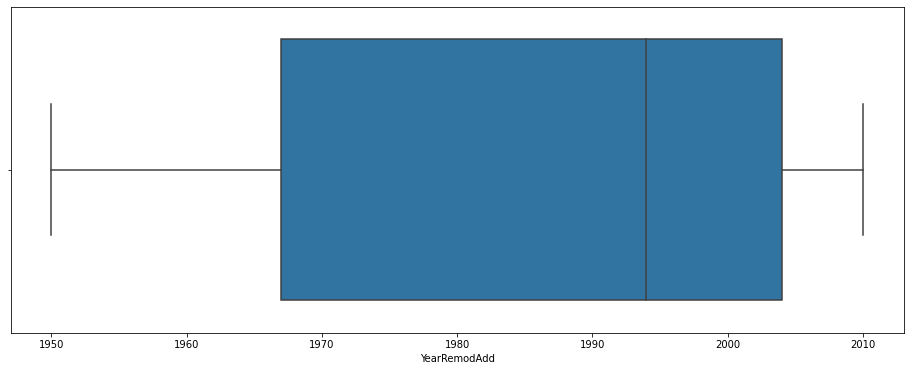

In [92]:
plot_numerical_feature("YearRemodAdd")

We see that oldest remodels happened around 1950s, for newer buildings remodel wasn't needed and we see the same pattern as in "YearBuilt"

To quicken up the process I will post graphs of all numerical features below:

Description of LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64 

Histogram of LotFrontage


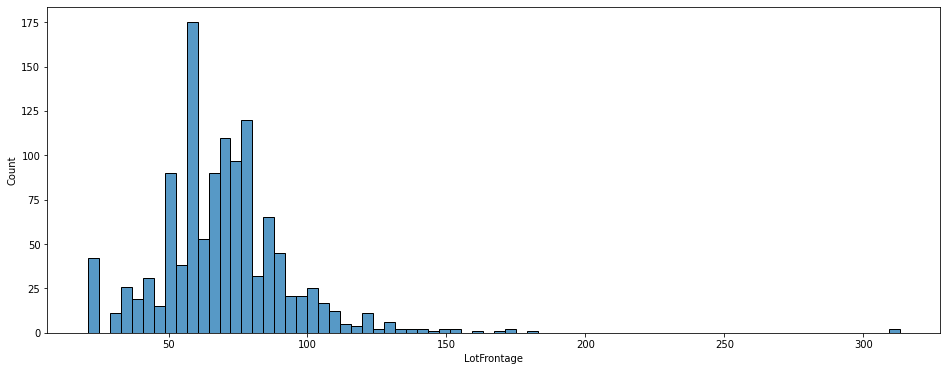

Kernel density estimation plot of LotFrontage


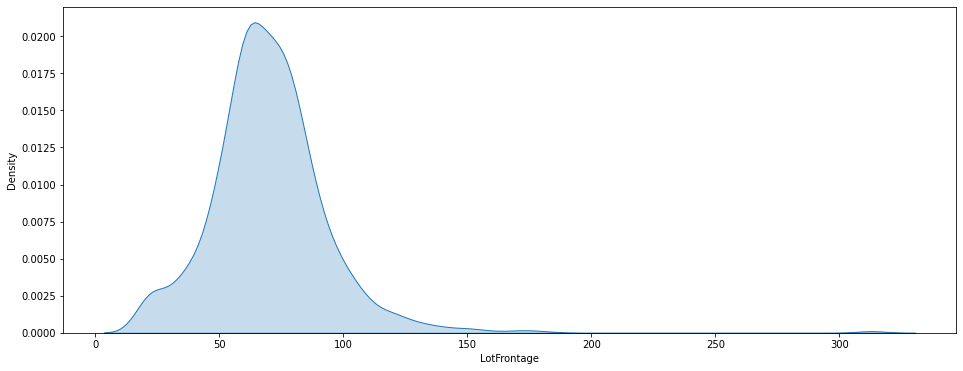

Box plot of LotFrontage


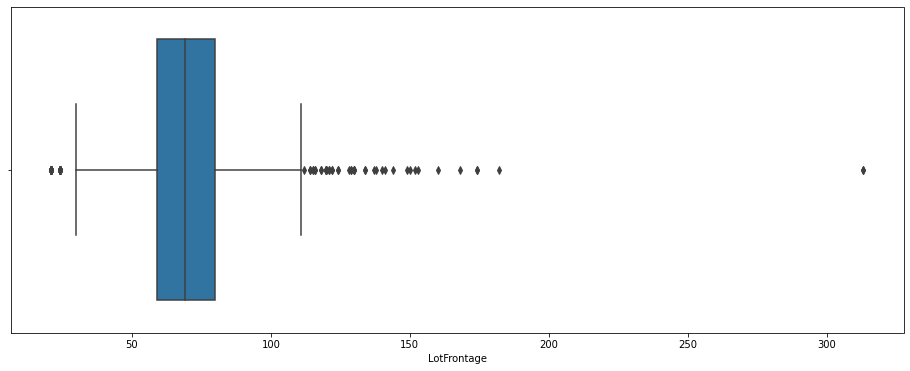

Description of LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64 

Histogram of LotArea


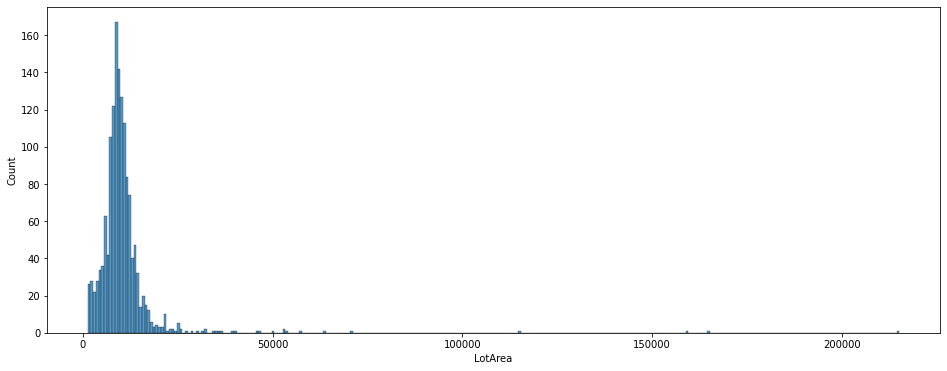

Kernel density estimation plot of LotArea


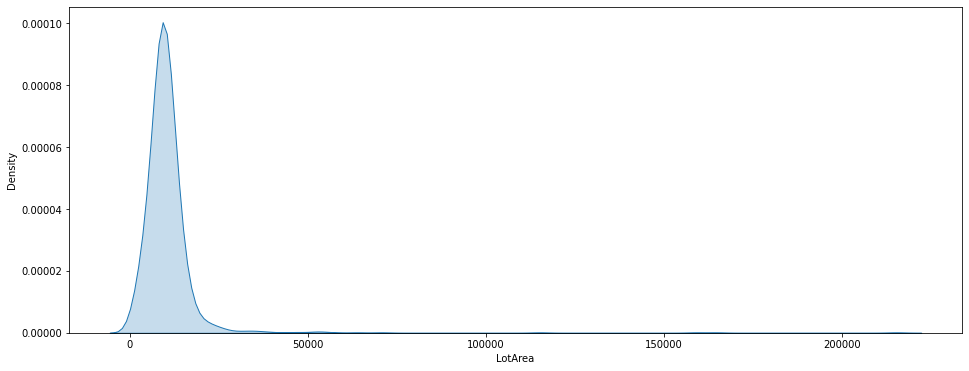

Box plot of LotArea


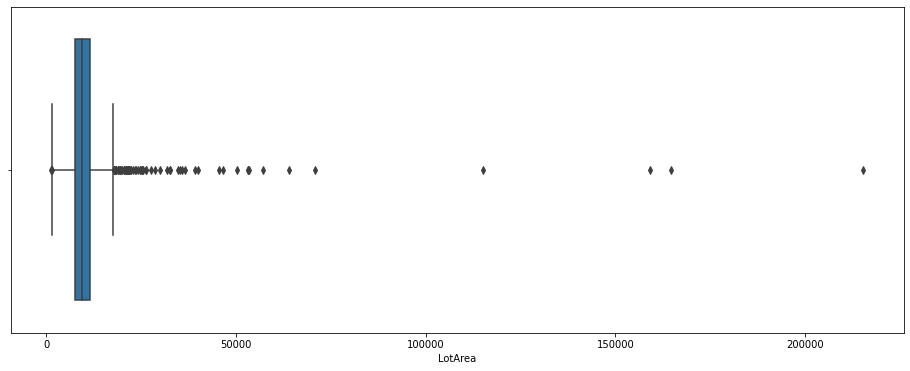

Description of YearBuilt
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64 

Histogram of YearBuilt


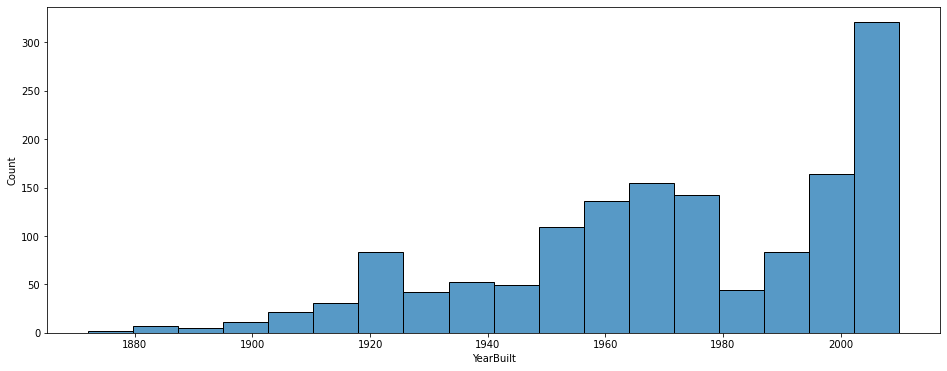

Kernel density estimation plot of YearBuilt


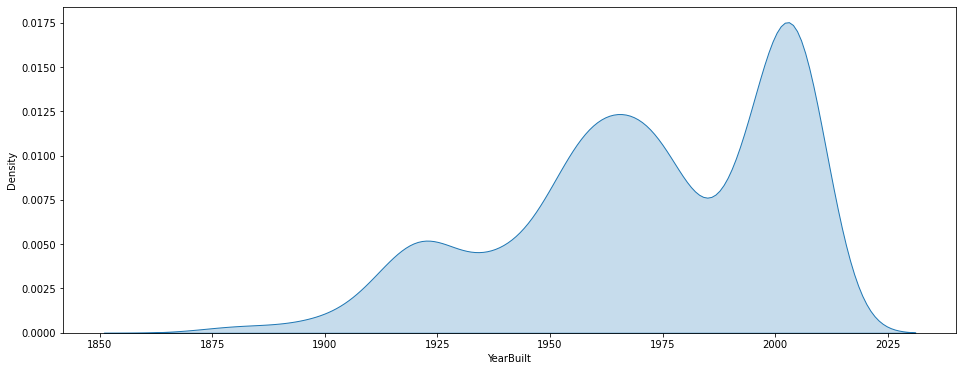

Box plot of YearBuilt


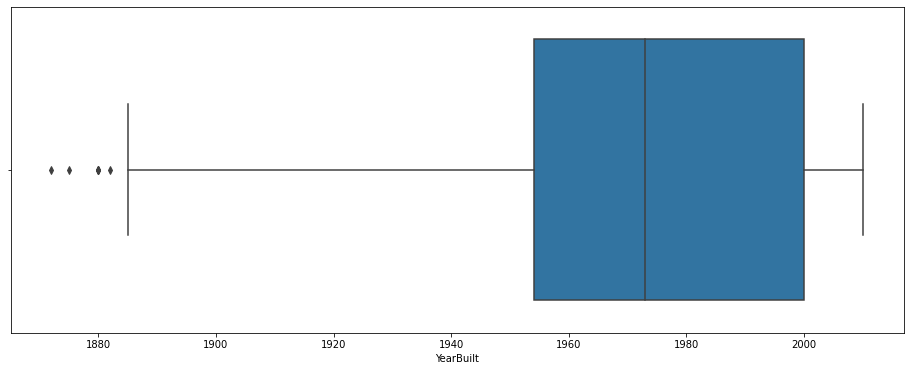

Description of YearRemodAdd
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64 

Histogram of YearRemodAdd


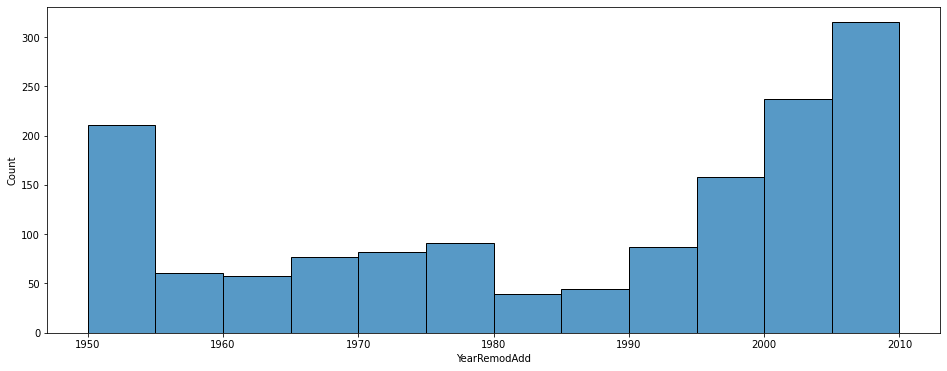

Kernel density estimation plot of YearRemodAdd


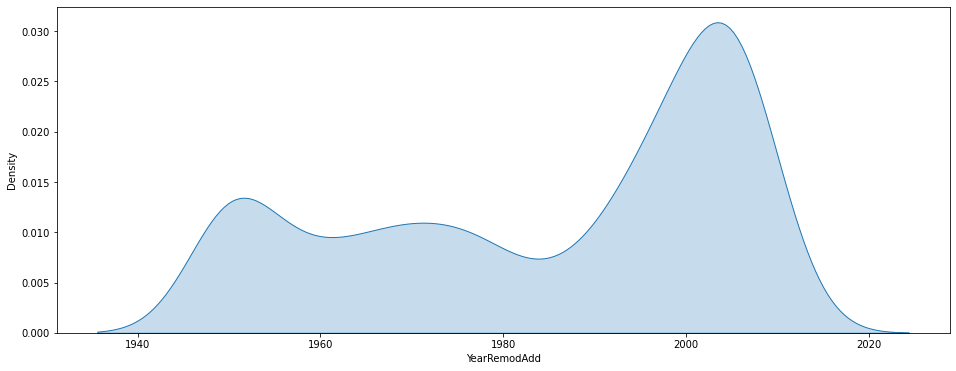

Box plot of YearRemodAdd


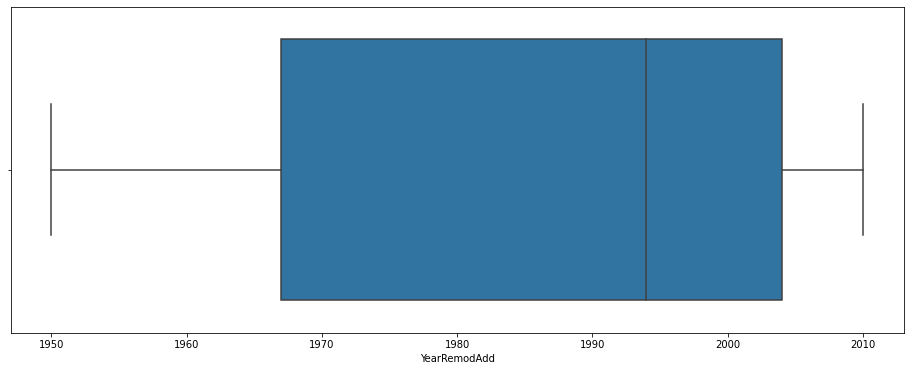

Description of MasVnrArea
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64 

Histogram of MasVnrArea


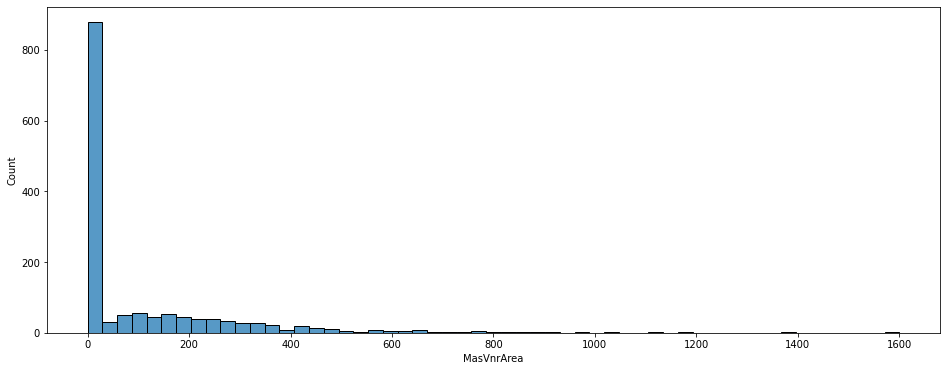

Kernel density estimation plot of MasVnrArea


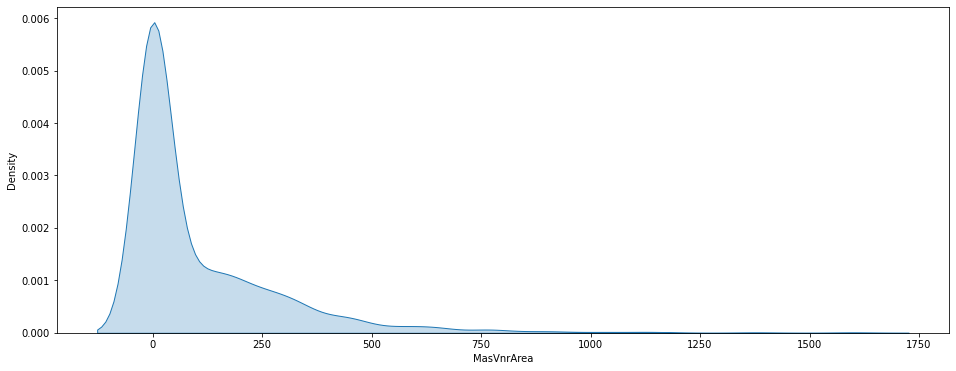

Box plot of MasVnrArea


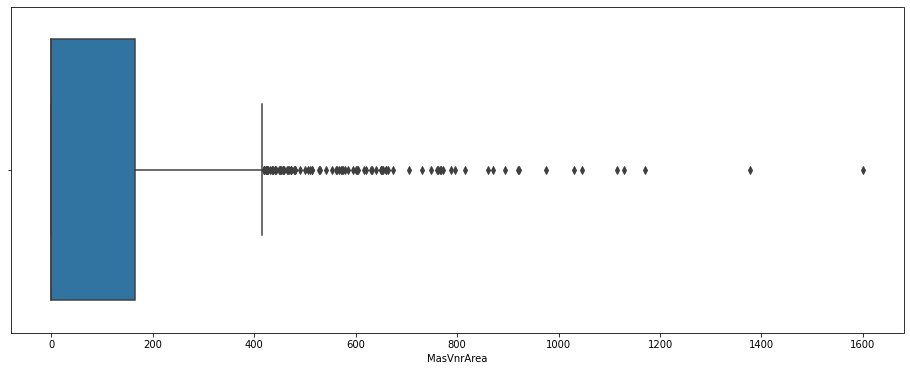

Description of BsmtFinSF1
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64 

Histogram of BsmtFinSF1


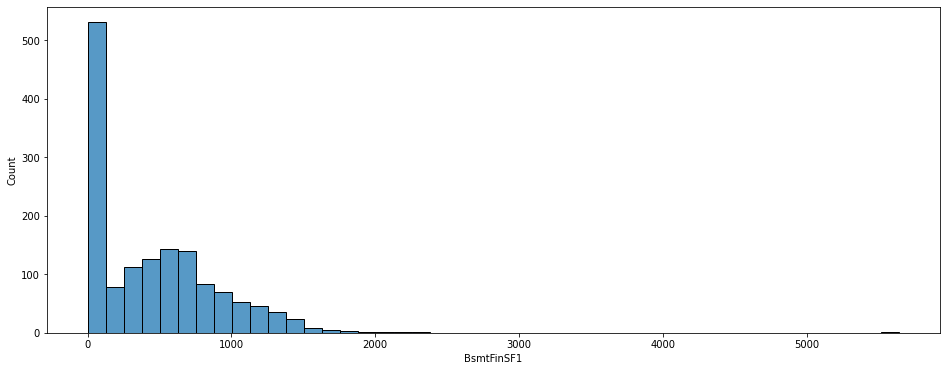

Kernel density estimation plot of BsmtFinSF1


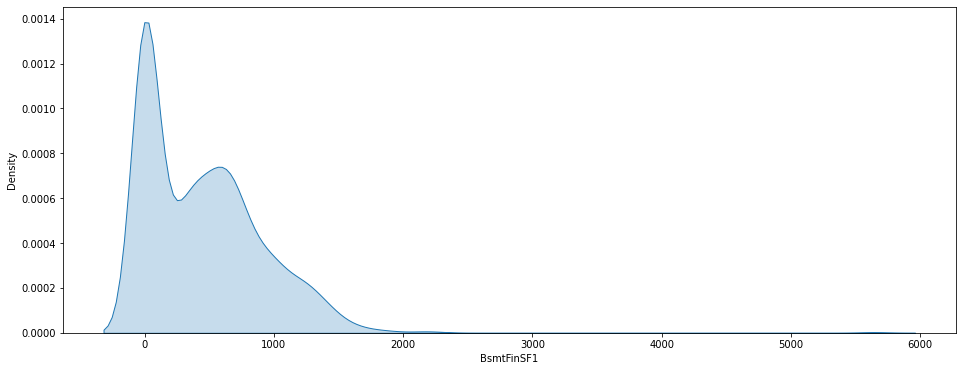

Box plot of BsmtFinSF1


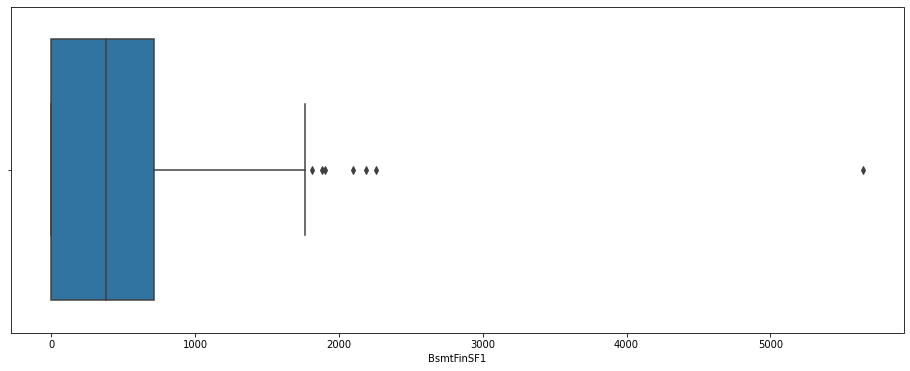

Description of BsmtFinSF2
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64 

Histogram of BsmtFinSF2


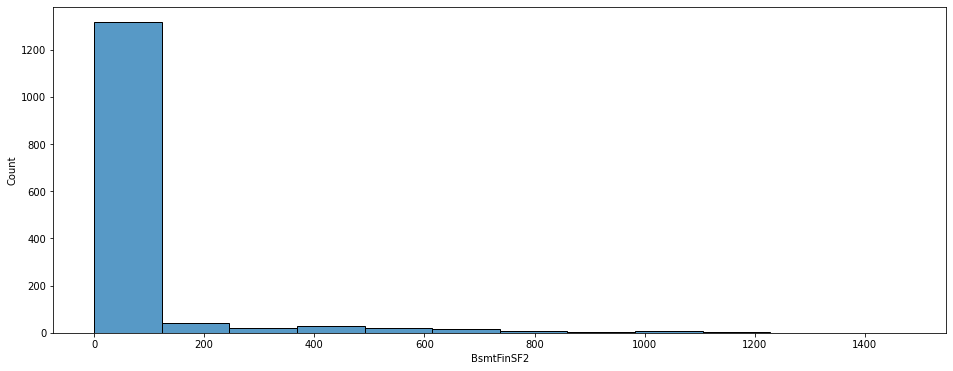

Kernel density estimation plot of BsmtFinSF2


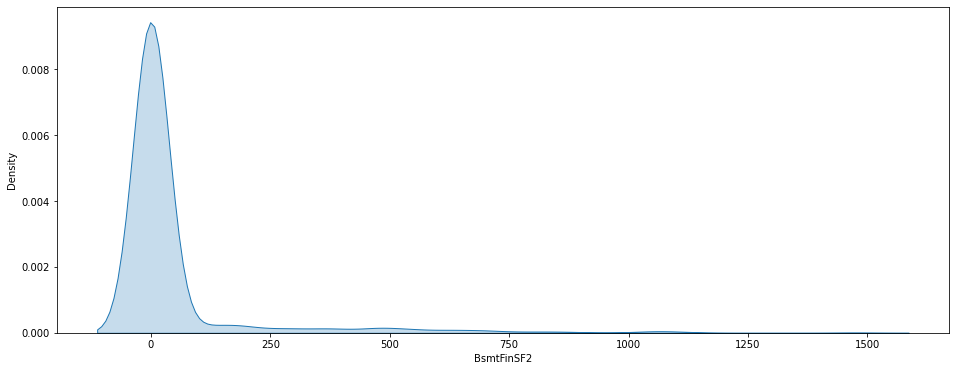

Box plot of BsmtFinSF2


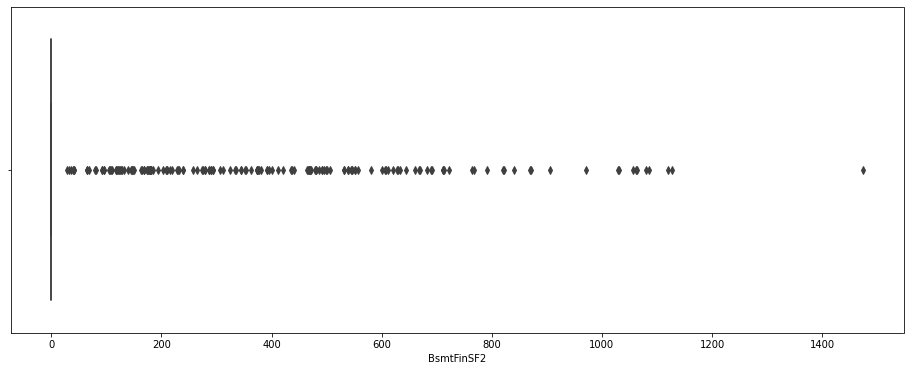

Description of BsmtUnfSF
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64 

Histogram of BsmtUnfSF


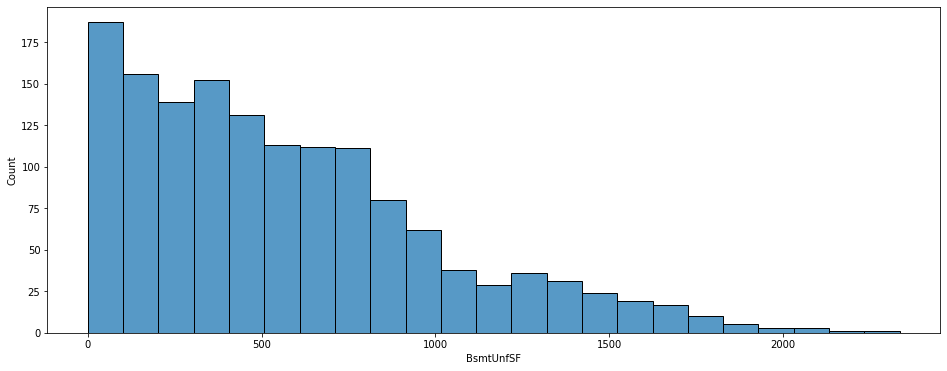

Kernel density estimation plot of BsmtUnfSF


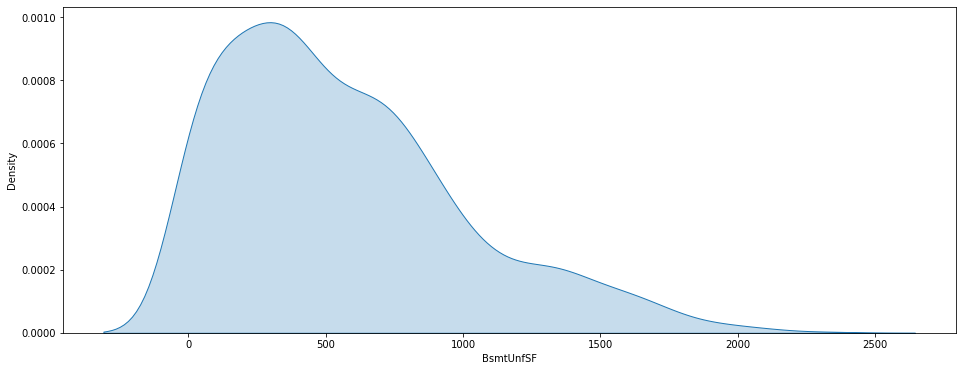

Box plot of BsmtUnfSF


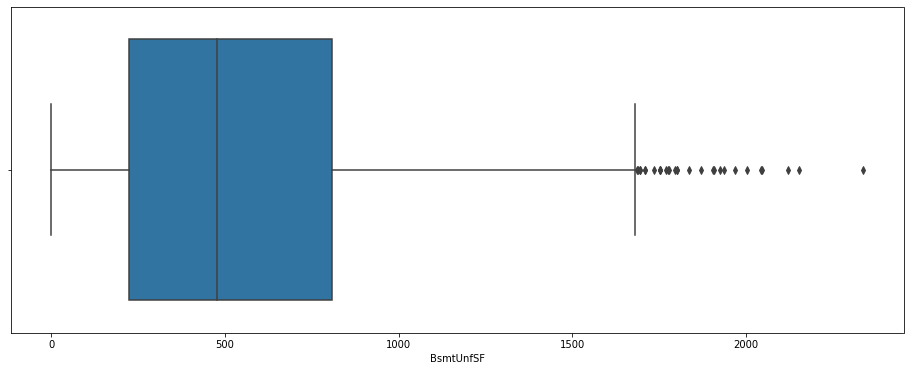

Description of TotalBsmtSF
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64 

Histogram of TotalBsmtSF


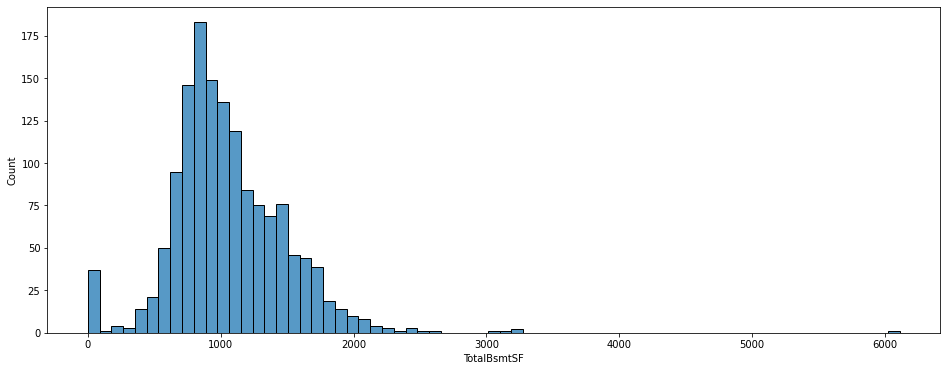

Kernel density estimation plot of TotalBsmtSF


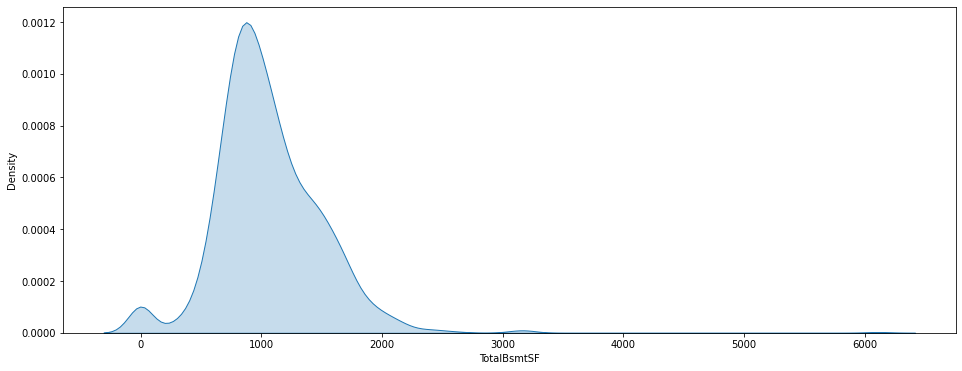

Box plot of TotalBsmtSF


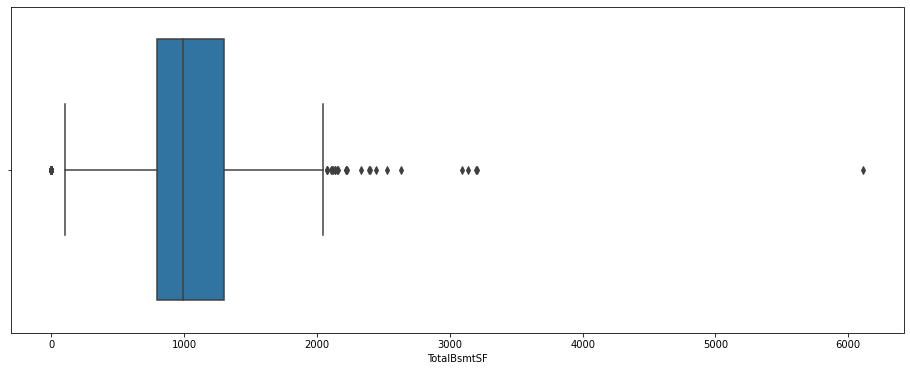

Description of 1stFlrSF
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64 

Histogram of 1stFlrSF


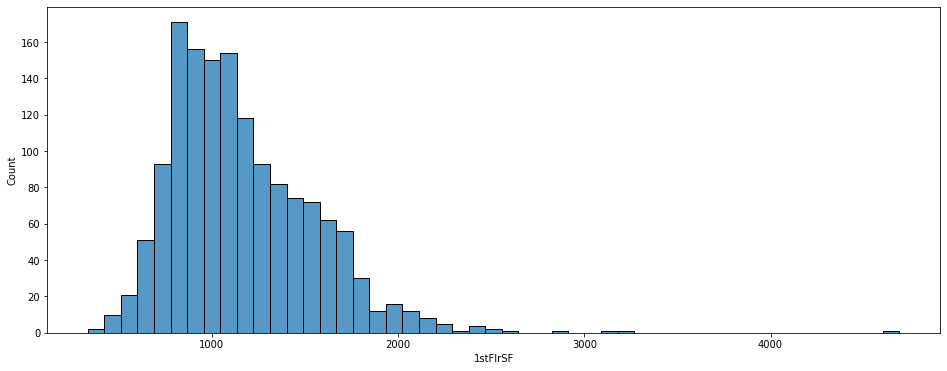

Kernel density estimation plot of 1stFlrSF


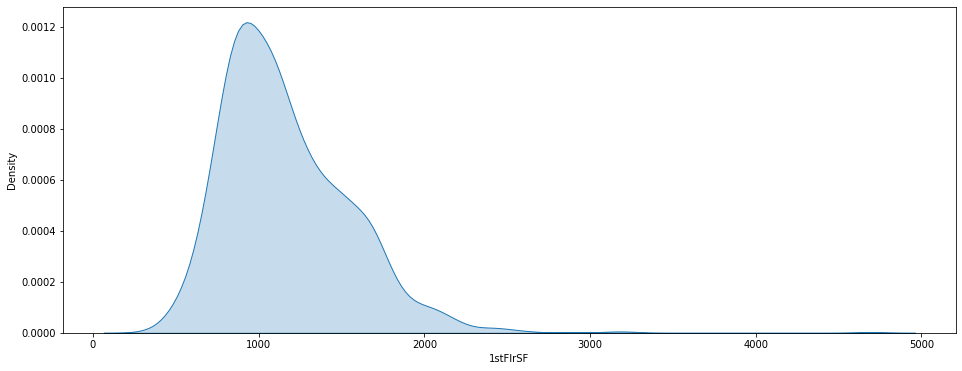

Box plot of 1stFlrSF


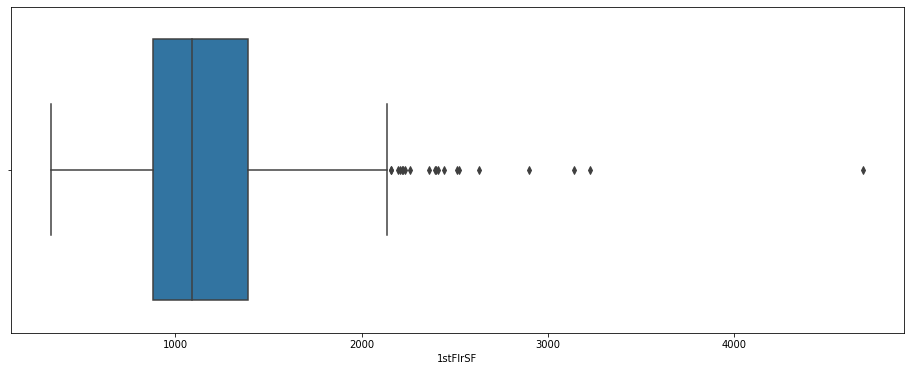

Description of 2ndFlrSF
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64 

Histogram of 2ndFlrSF


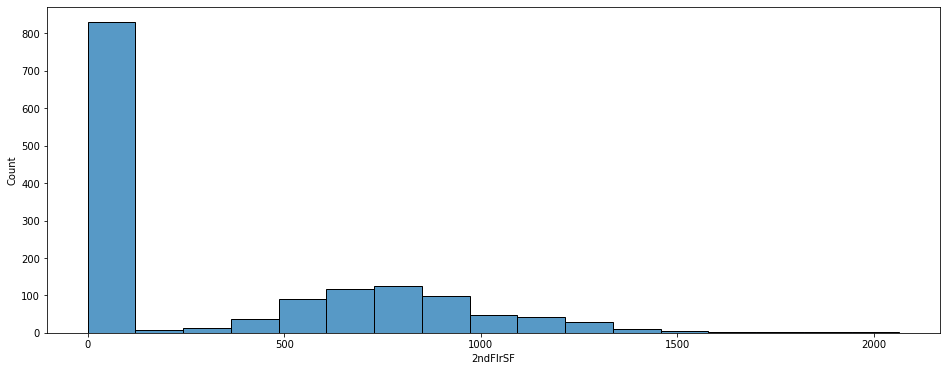

Kernel density estimation plot of 2ndFlrSF


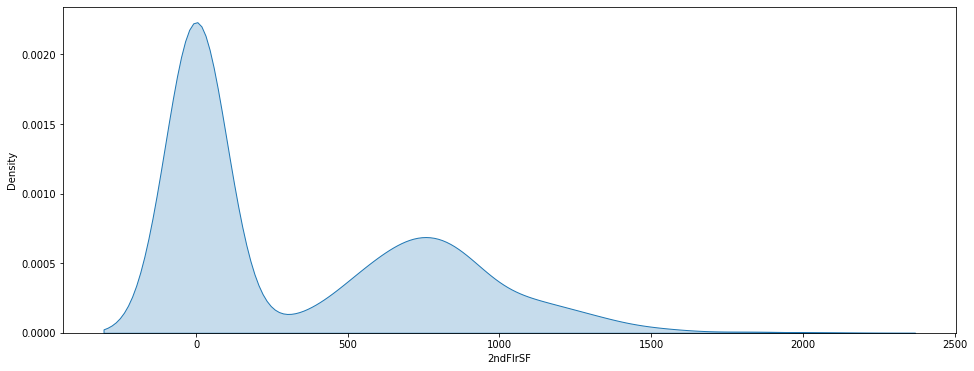

Box plot of 2ndFlrSF


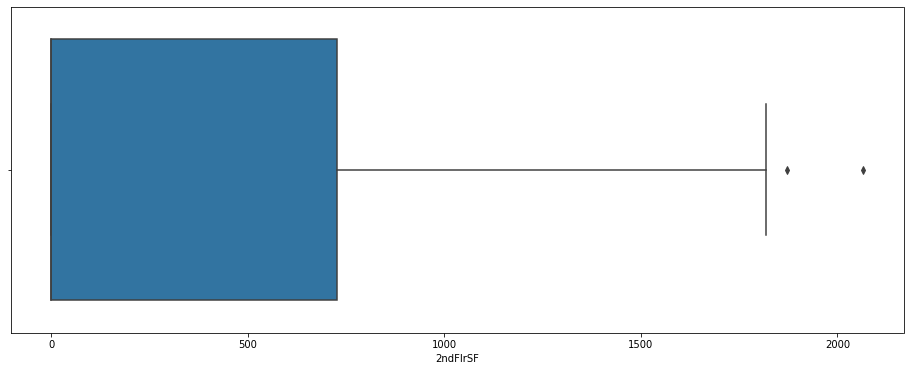

Description of LowQualFinSF
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64 

Histogram of LowQualFinSF


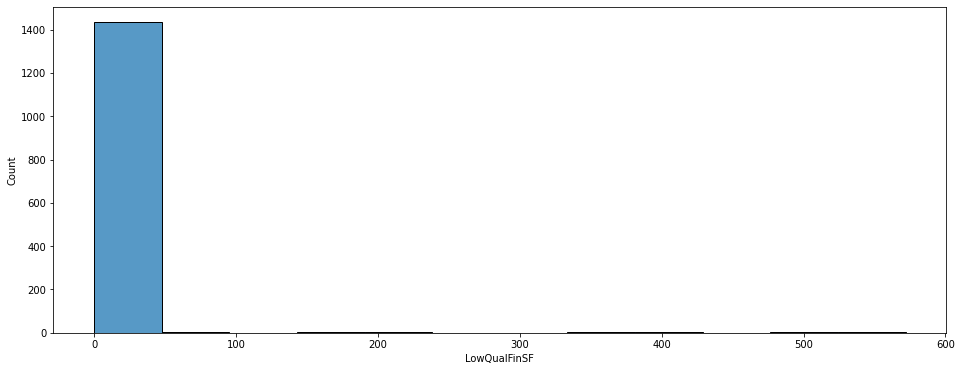

Kernel density estimation plot of LowQualFinSF


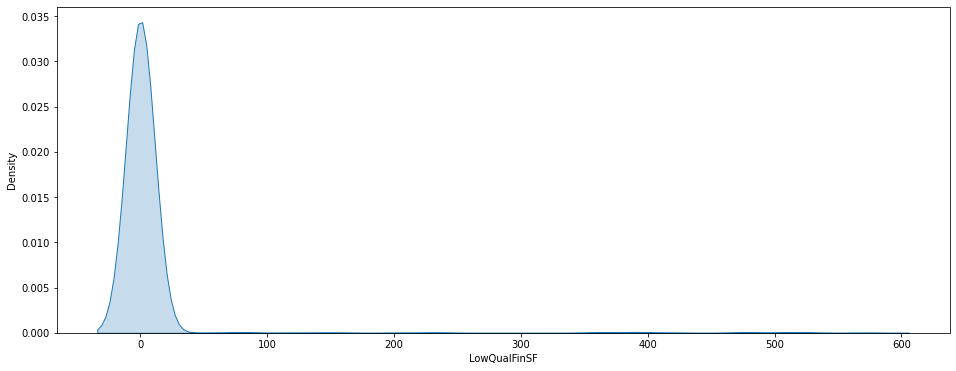

Box plot of LowQualFinSF


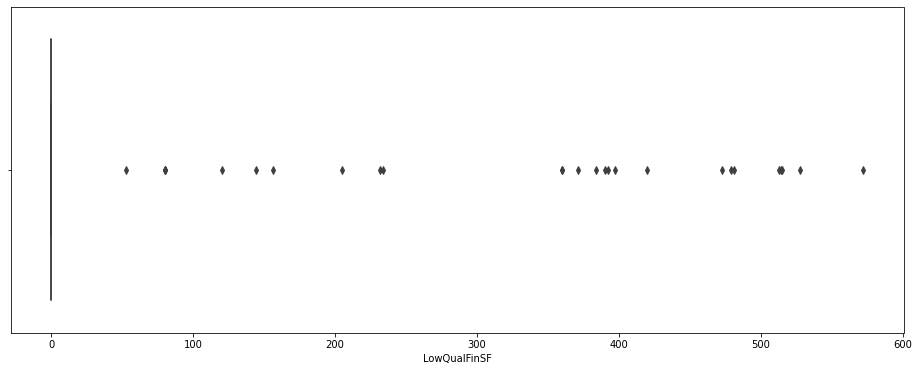

Description of GrLivArea
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64 

Histogram of GrLivArea


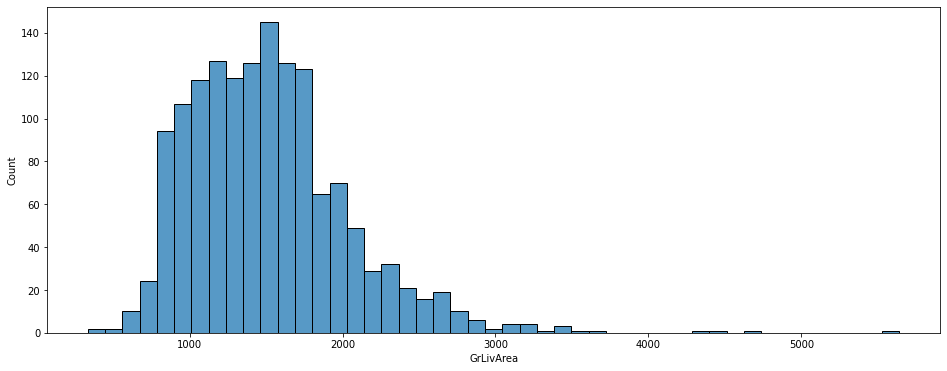

Kernel density estimation plot of GrLivArea


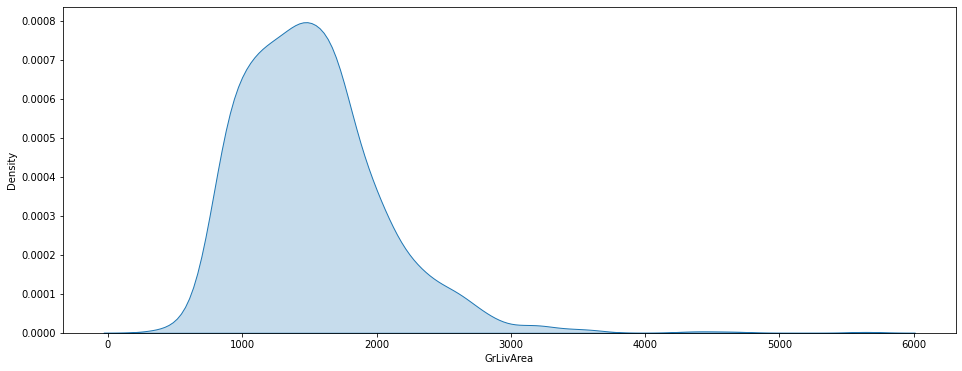

Box plot of GrLivArea


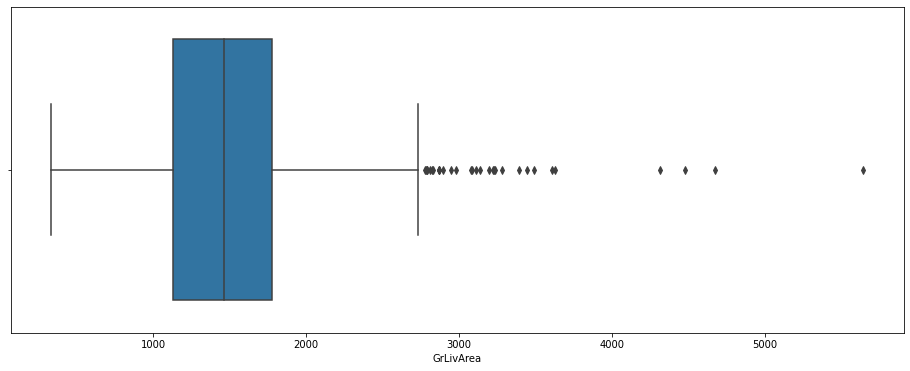

Description of BsmtFullBath
count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64 

Histogram of BsmtFullBath


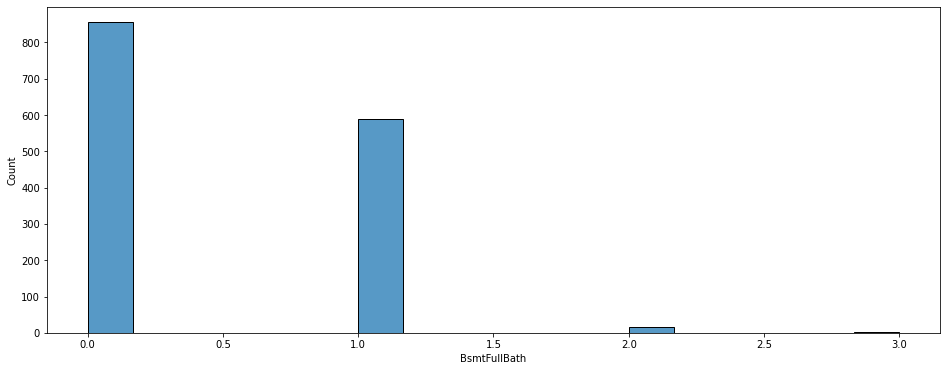

Kernel density estimation plot of BsmtFullBath


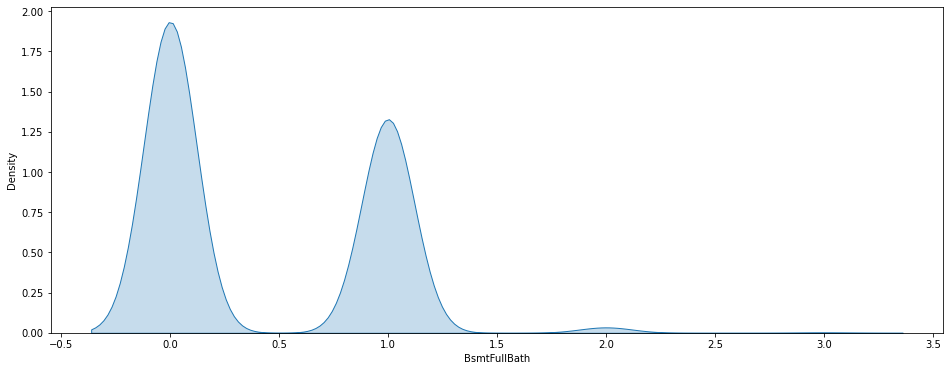

Box plot of BsmtFullBath


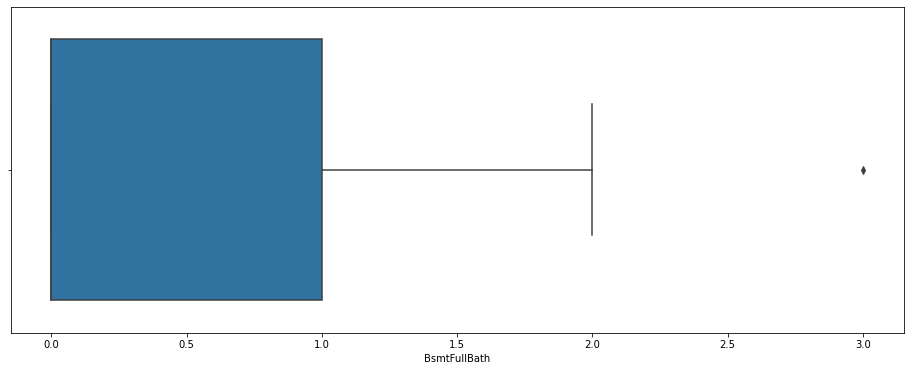

Description of BsmtHalfBath
count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64 

Histogram of BsmtHalfBath


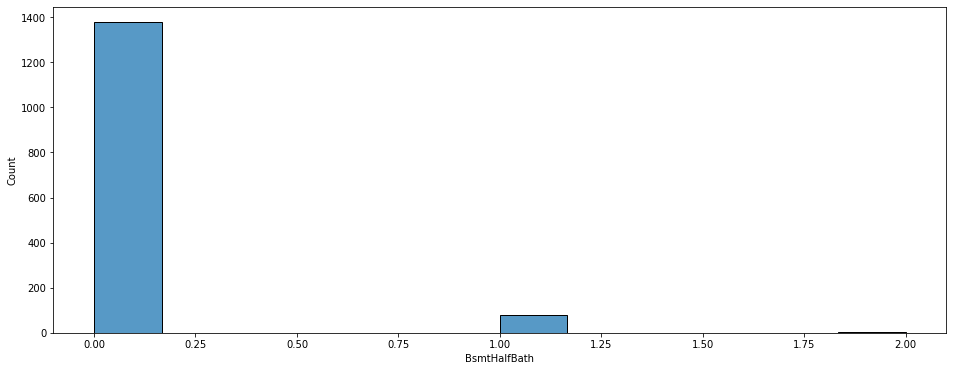

Kernel density estimation plot of BsmtHalfBath


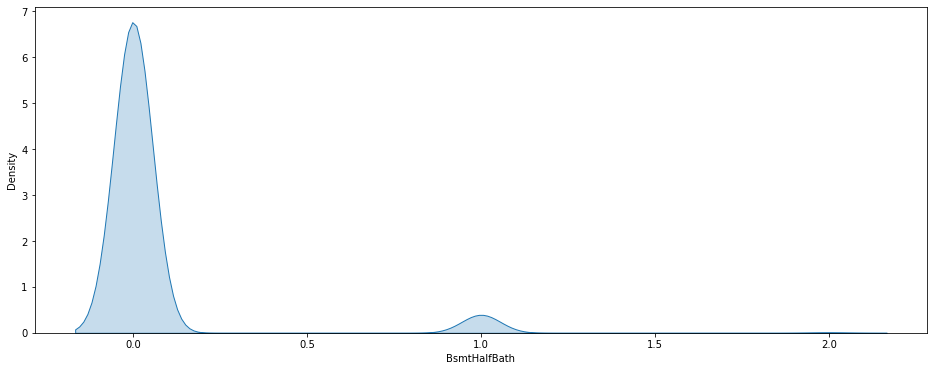

Box plot of BsmtHalfBath


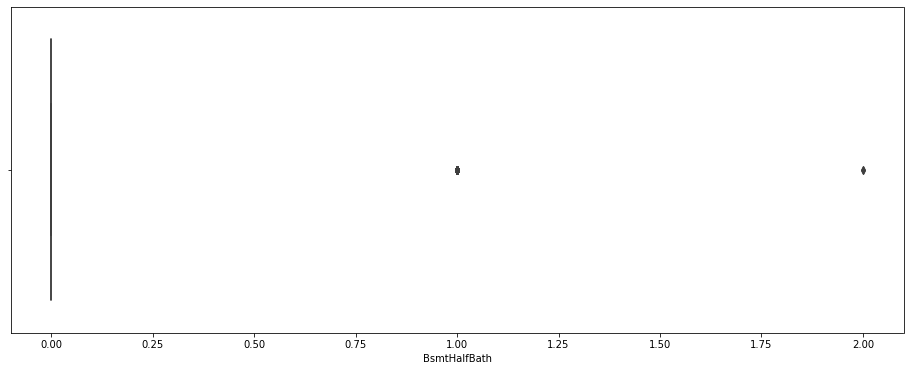

Description of FullBath
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64 

Histogram of FullBath


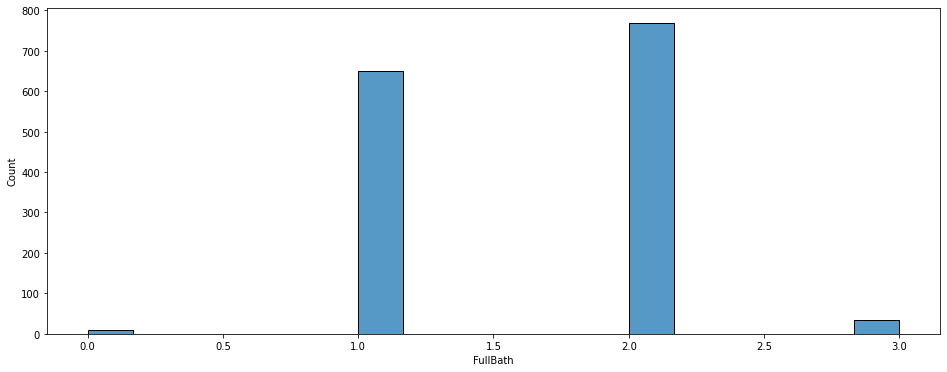

Kernel density estimation plot of FullBath


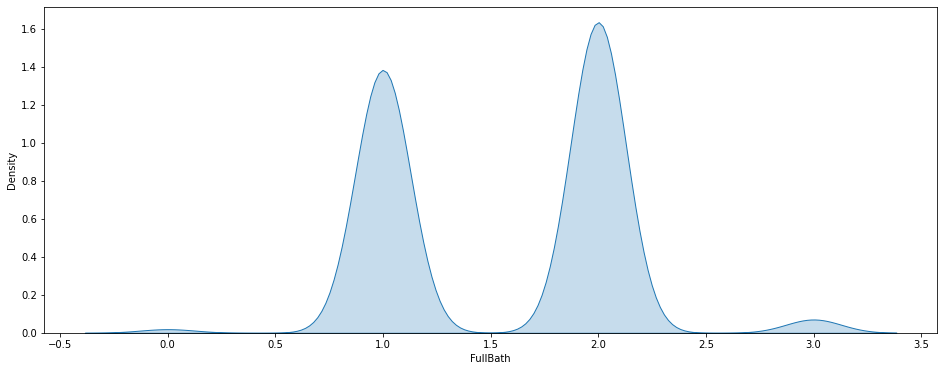

Box plot of FullBath


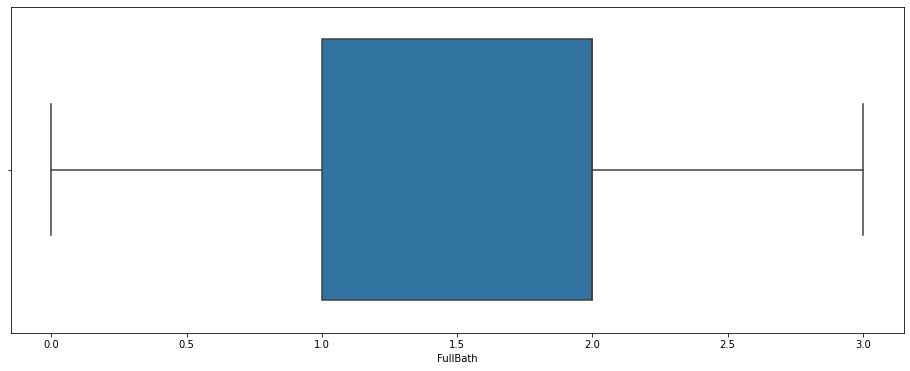

Description of HalfBath
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64 

Histogram of HalfBath


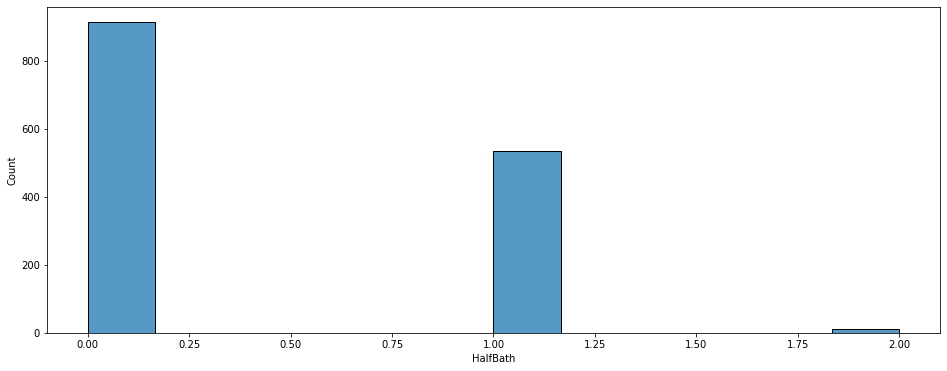

Kernel density estimation plot of HalfBath


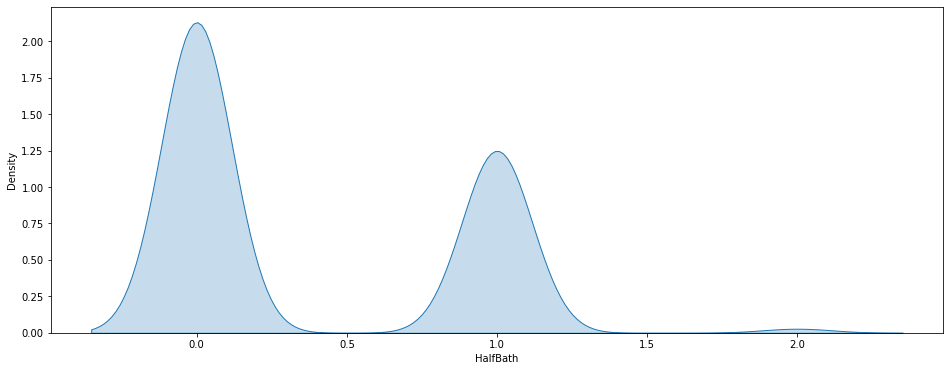

Box plot of HalfBath


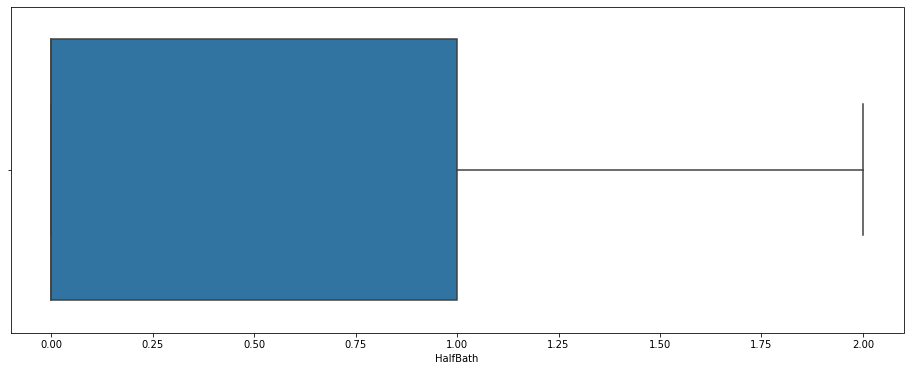

Description of BedroomAbvGr
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64 

Histogram of BedroomAbvGr


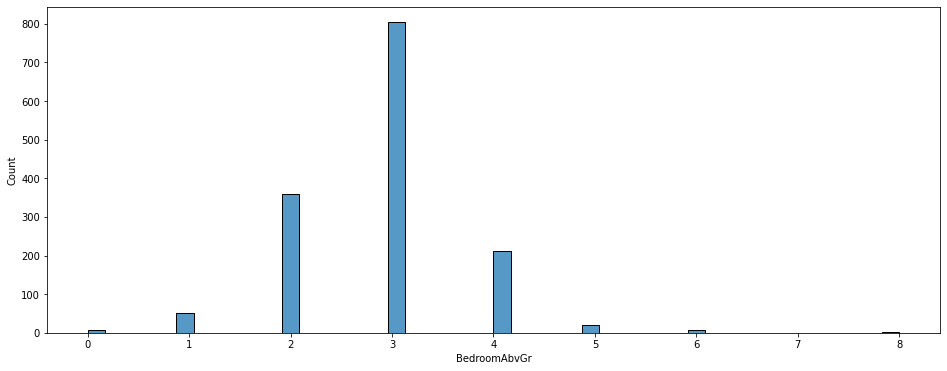

Kernel density estimation plot of BedroomAbvGr


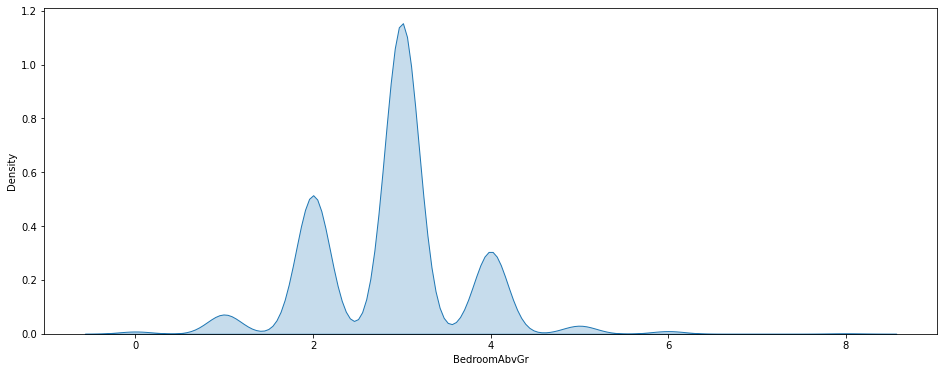

Box plot of BedroomAbvGr


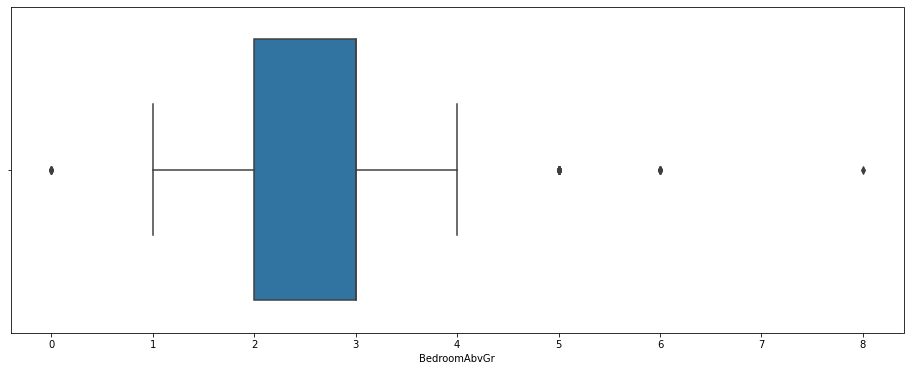

Description of KitchenAbvGr
count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64 

Histogram of KitchenAbvGr


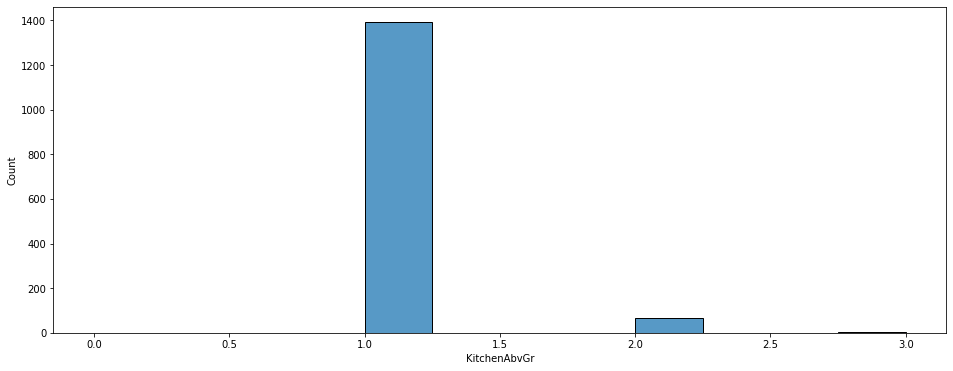

Kernel density estimation plot of KitchenAbvGr


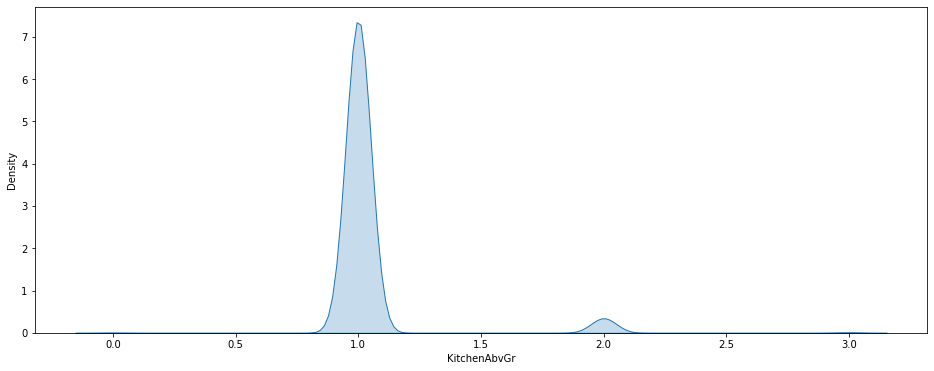

Box plot of KitchenAbvGr


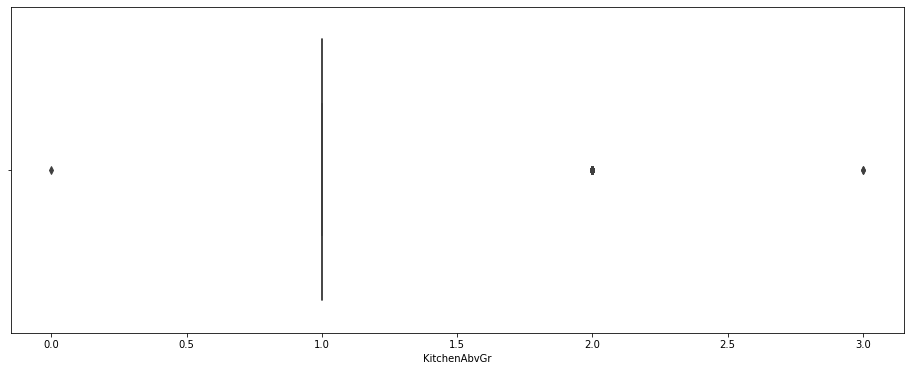

Description of TotRmsAbvGrd
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64 

Histogram of TotRmsAbvGrd


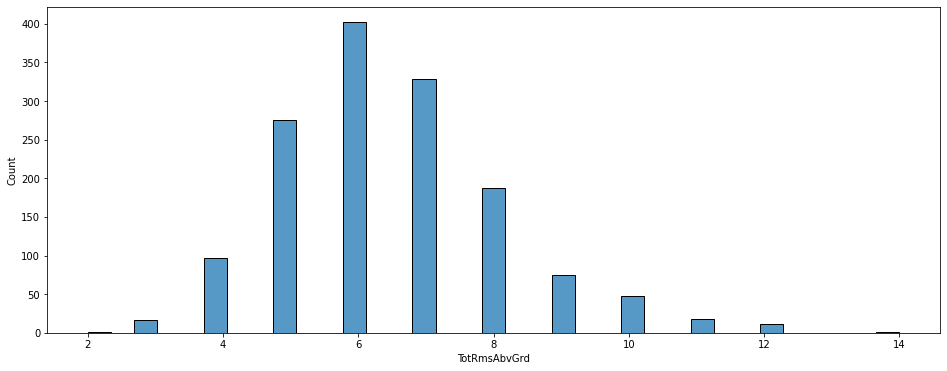

Kernel density estimation plot of TotRmsAbvGrd


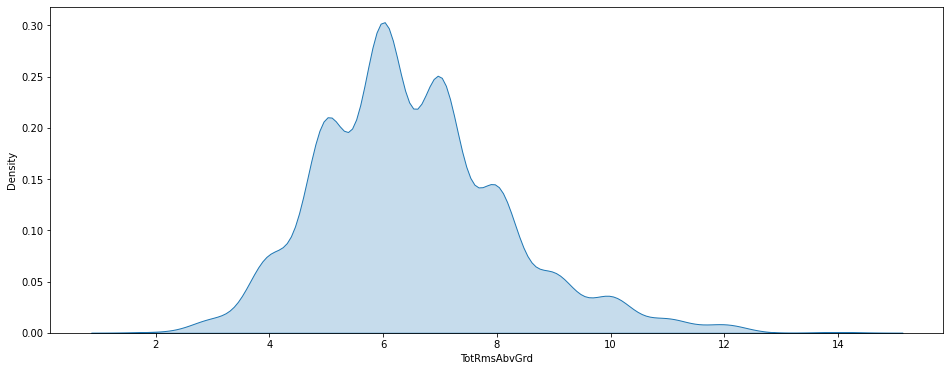

Box plot of TotRmsAbvGrd


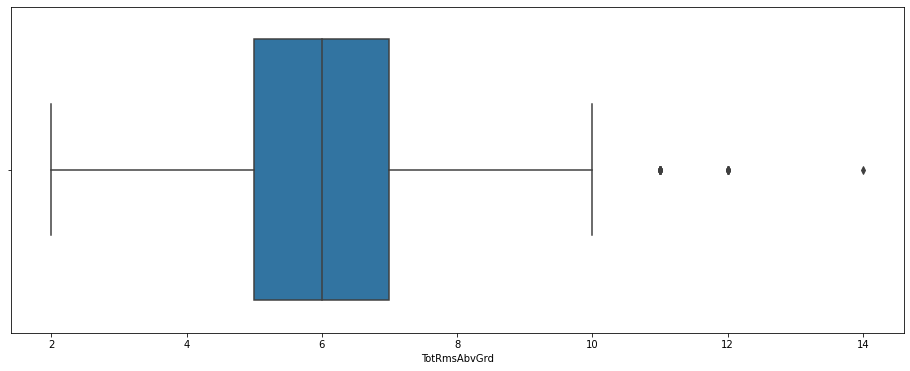

Description of Fireplaces
count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64 

Histogram of Fireplaces


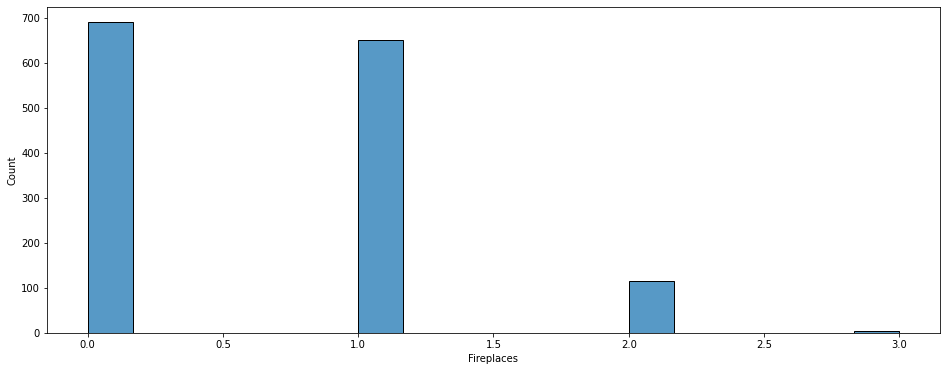

Kernel density estimation plot of Fireplaces


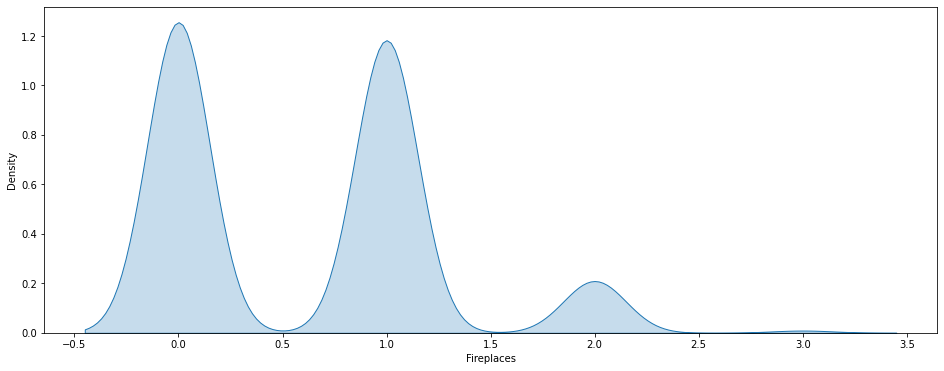

Box plot of Fireplaces


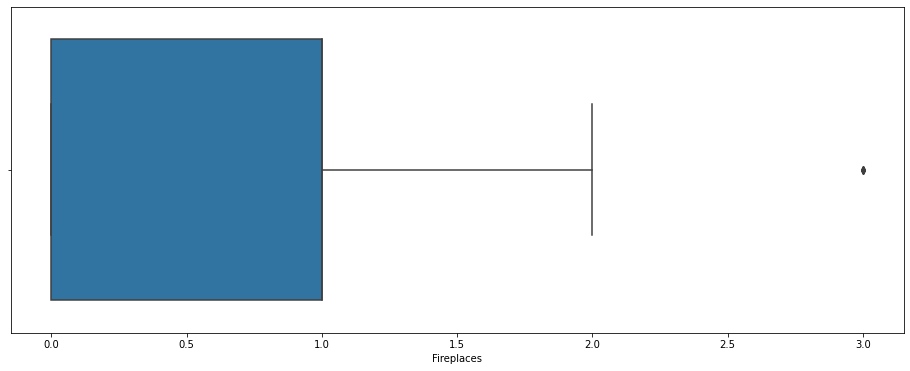

Description of GarageYrBlt
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64 

Histogram of GarageYrBlt


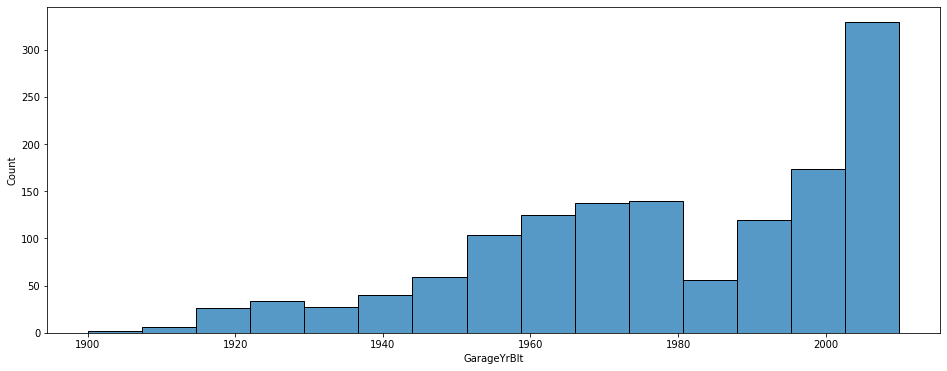

Kernel density estimation plot of GarageYrBlt


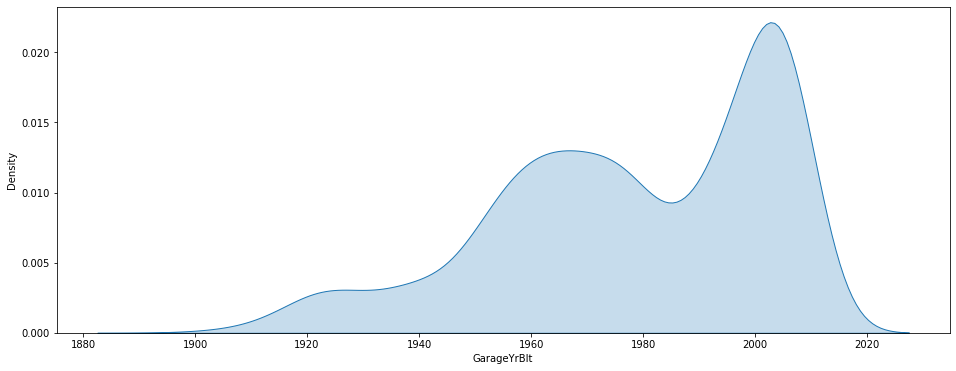

Box plot of GarageYrBlt


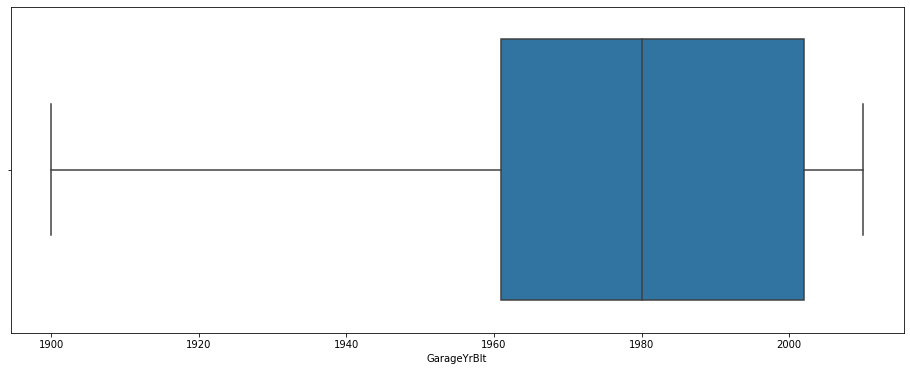

Description of GarageCars
count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64 

Histogram of GarageCars


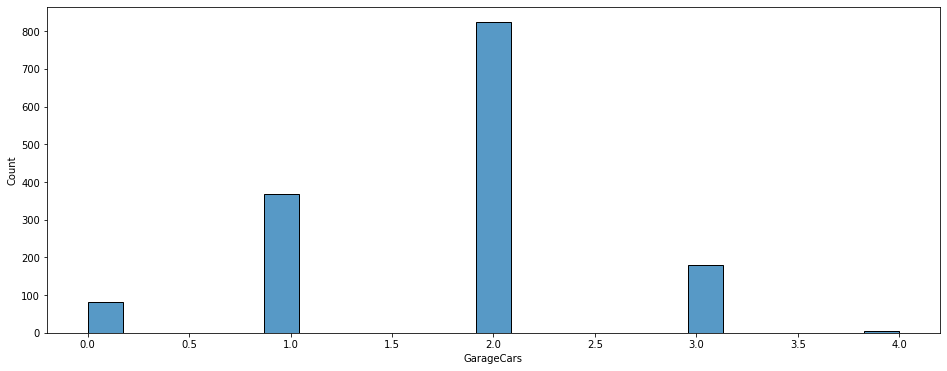

Kernel density estimation plot of GarageCars


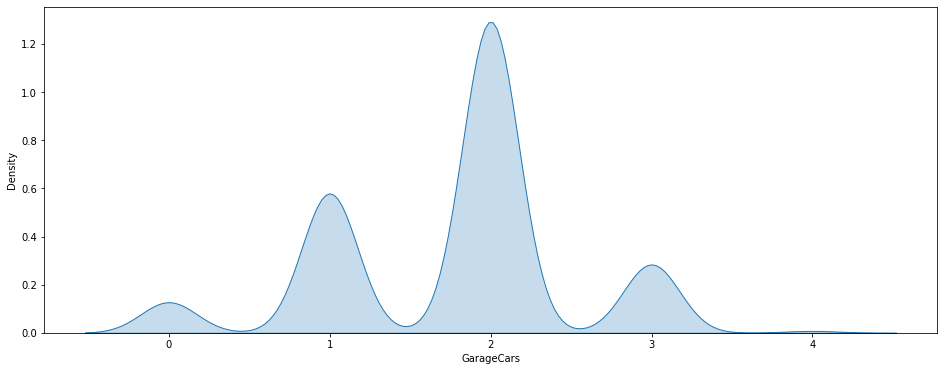

Box plot of GarageCars


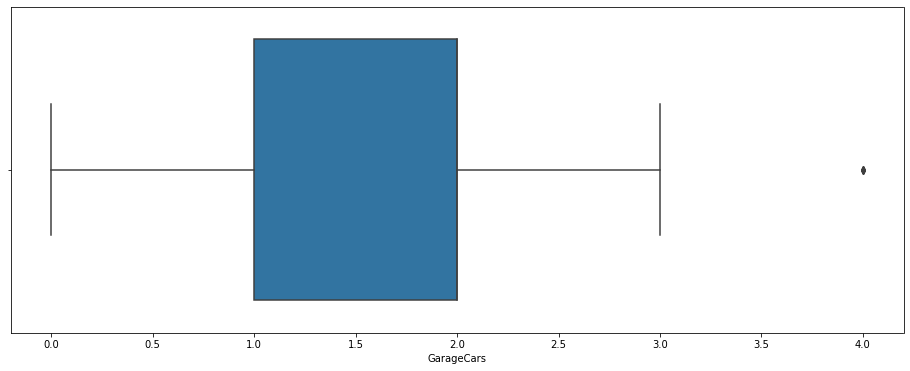

Description of GarageArea
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64 

Histogram of GarageArea


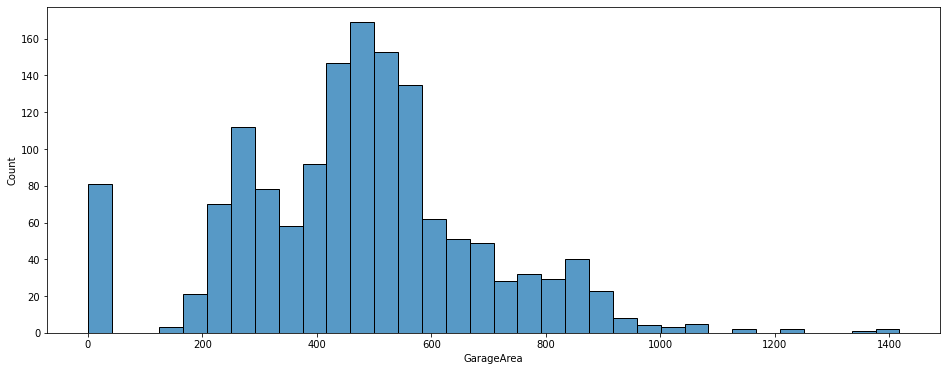

Kernel density estimation plot of GarageArea


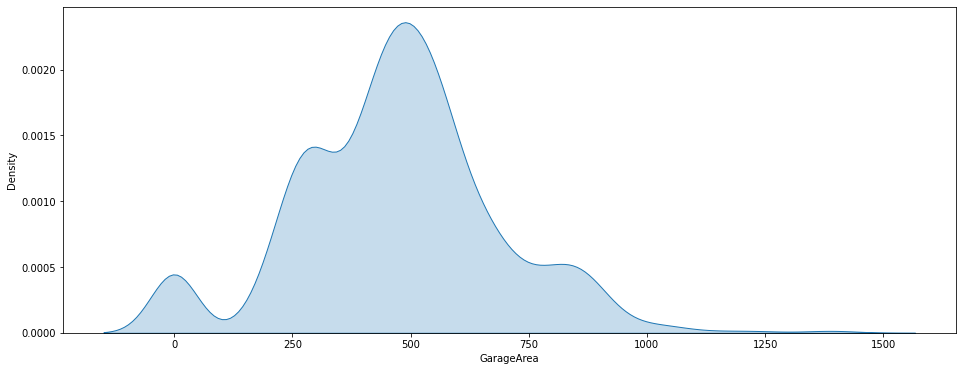

Box plot of GarageArea


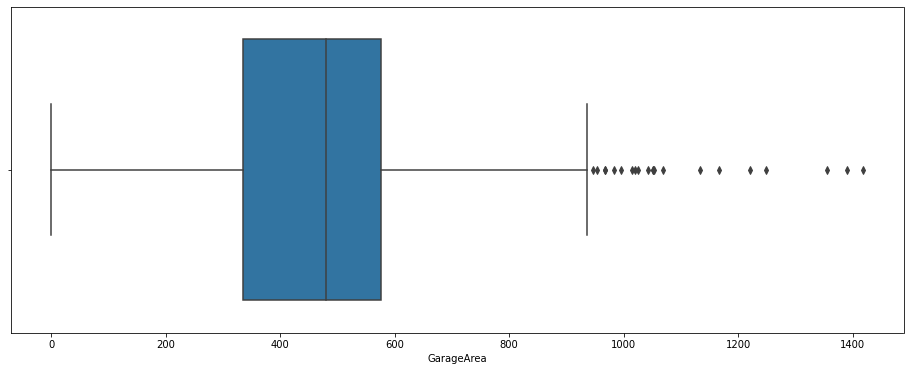

Description of WoodDeckSF
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64 

Histogram of WoodDeckSF


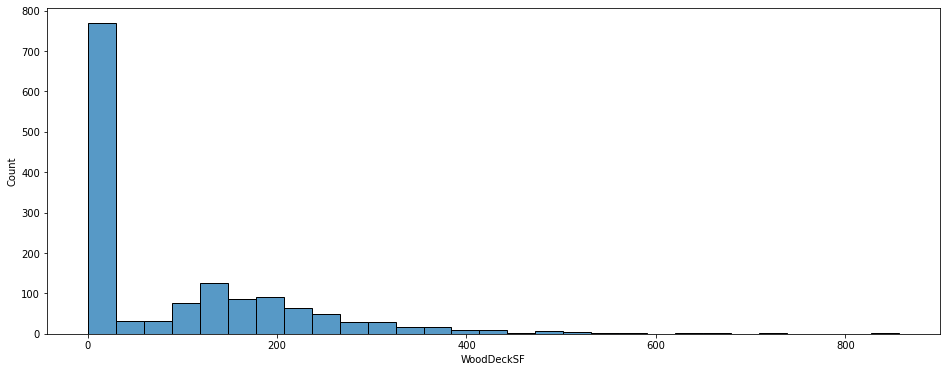

Kernel density estimation plot of WoodDeckSF


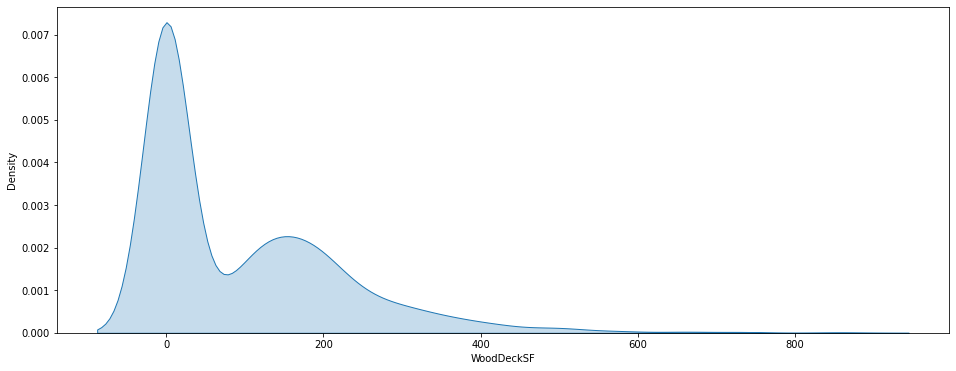

Box plot of WoodDeckSF


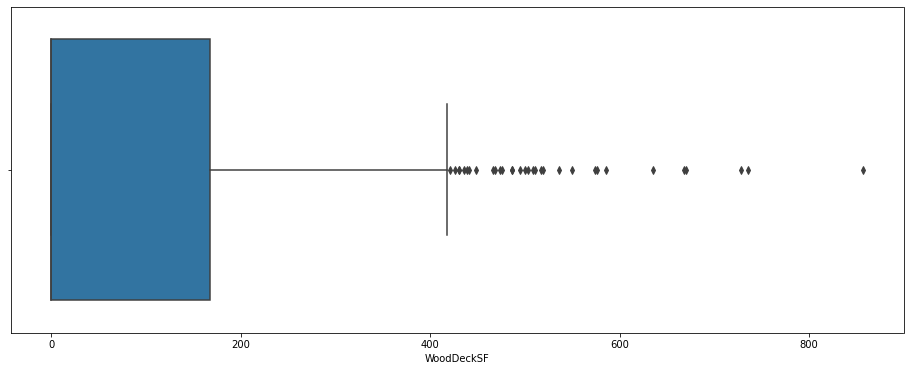

Description of OpenPorchSF
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64 

Histogram of OpenPorchSF


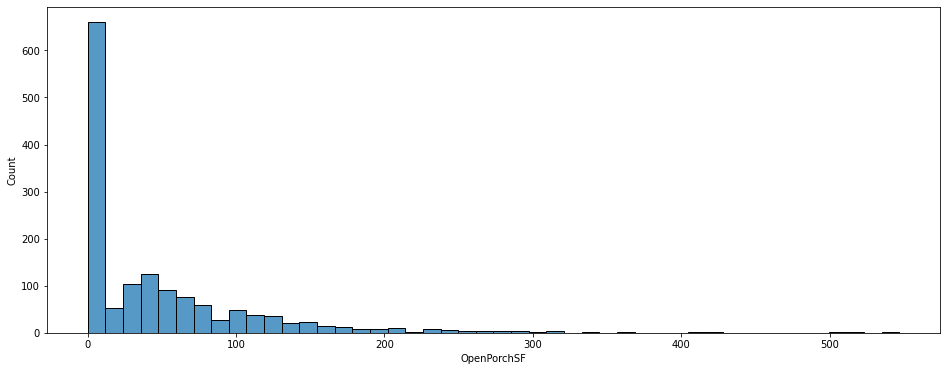

Kernel density estimation plot of OpenPorchSF


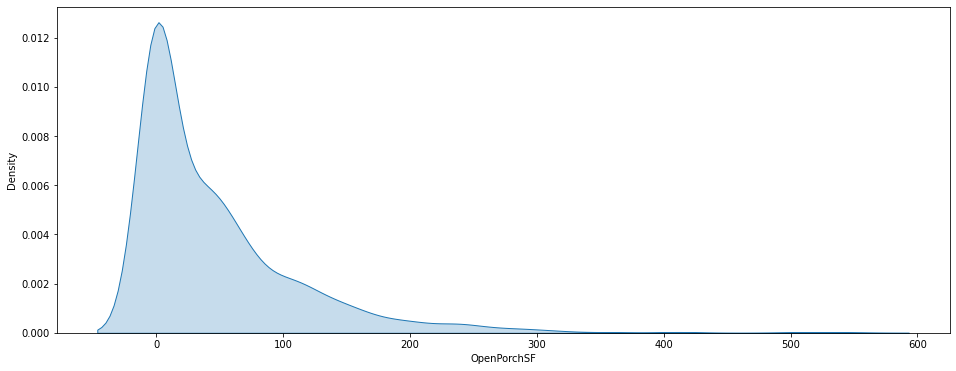

Box plot of OpenPorchSF


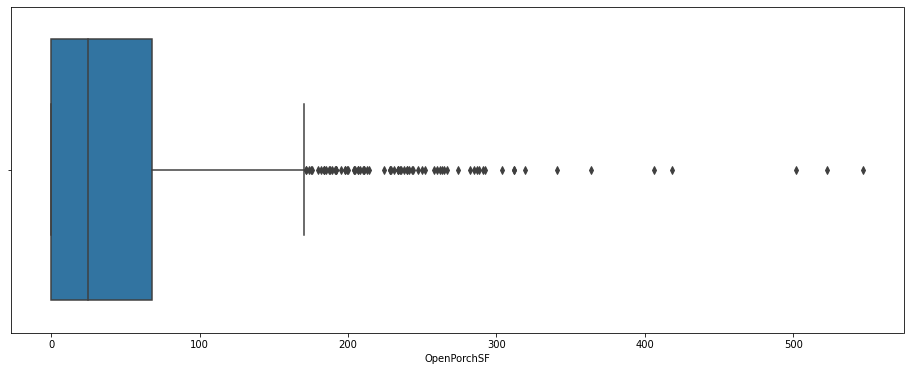

Description of EnclosedPorch
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64 

Histogram of EnclosedPorch


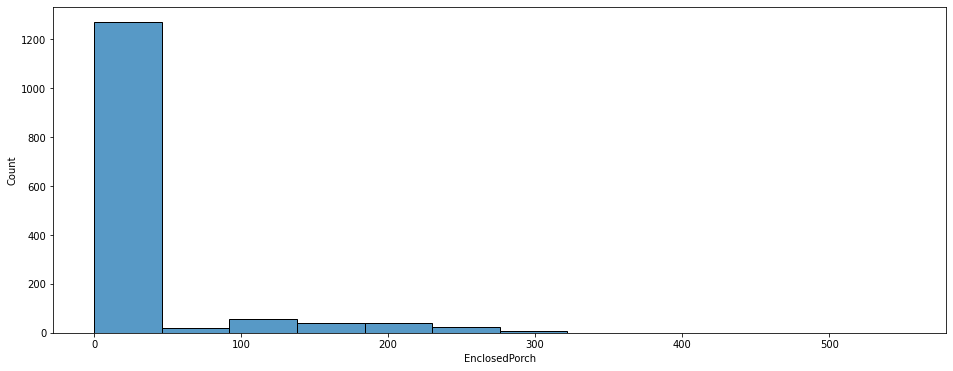

Kernel density estimation plot of EnclosedPorch


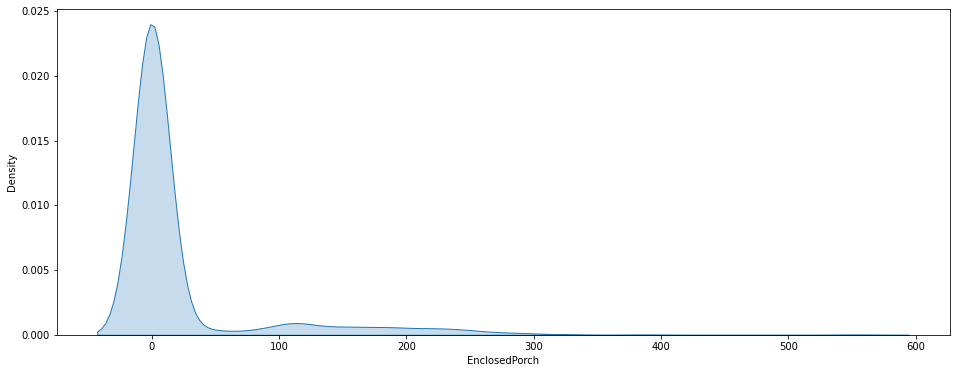

Box plot of EnclosedPorch


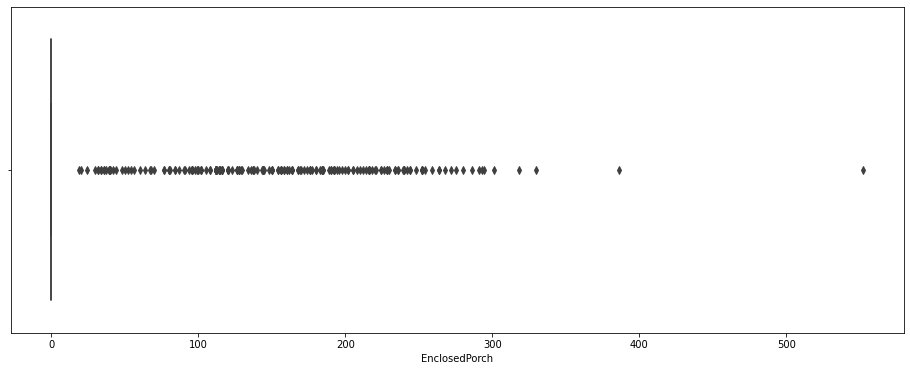

Description of 3SsnPorch
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64 

Histogram of 3SsnPorch


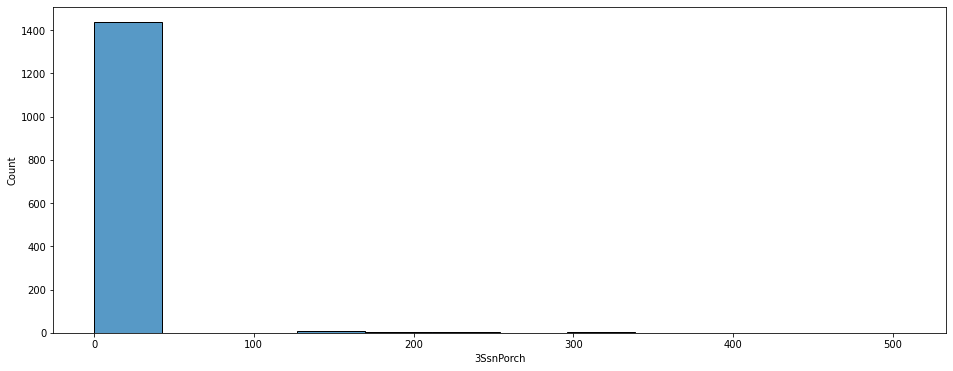

Kernel density estimation plot of 3SsnPorch


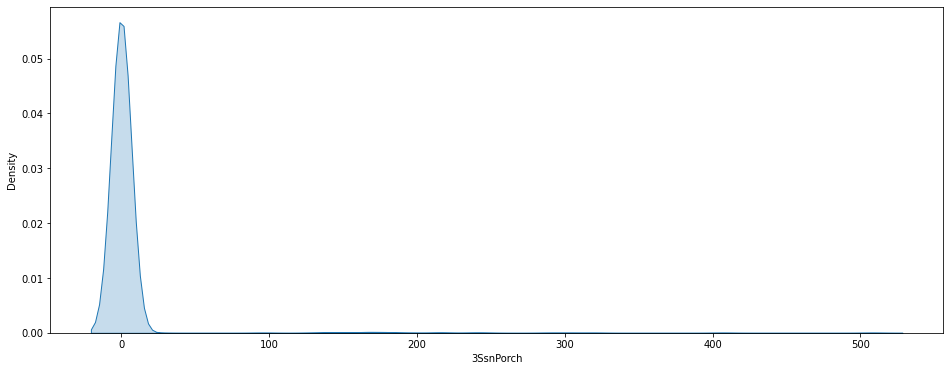

Box plot of 3SsnPorch


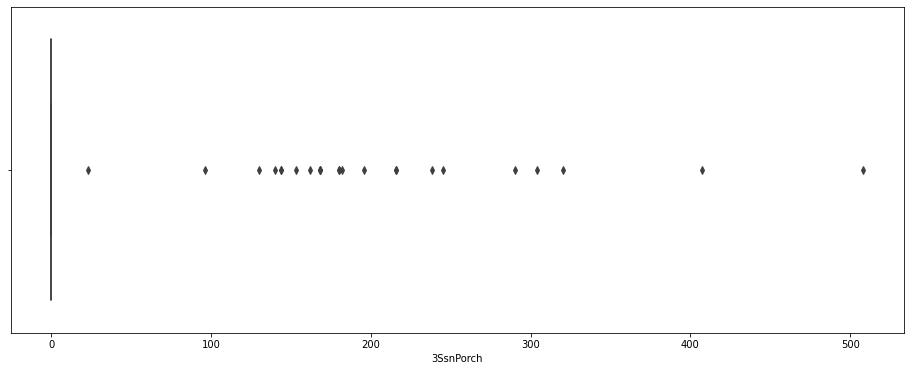

Description of ScreenPorch
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64 

Histogram of ScreenPorch


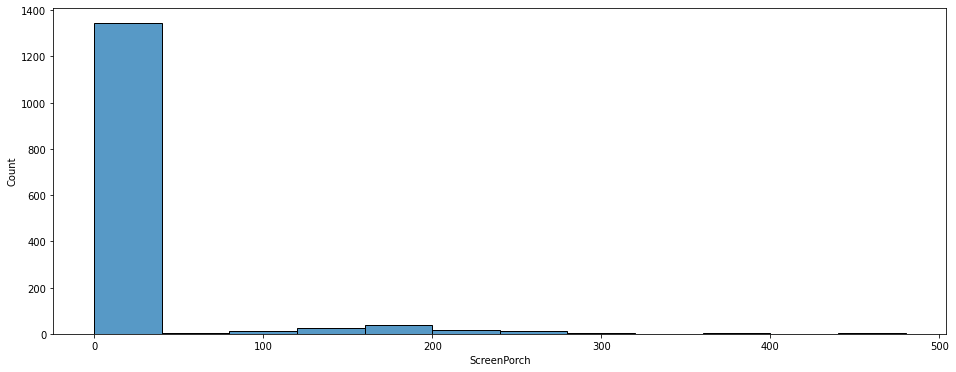

Kernel density estimation plot of ScreenPorch


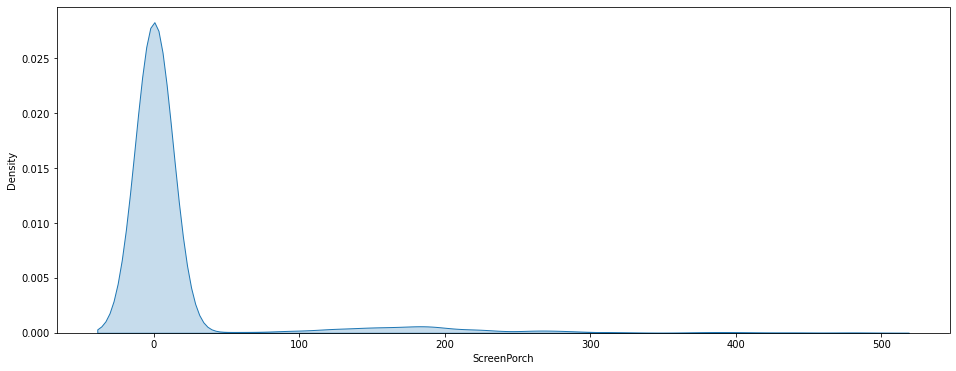

Box plot of ScreenPorch


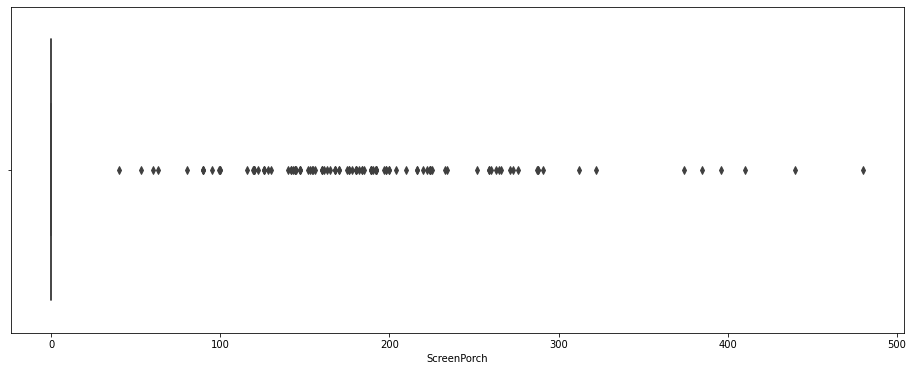

Description of PoolArea
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64 

Histogram of PoolArea


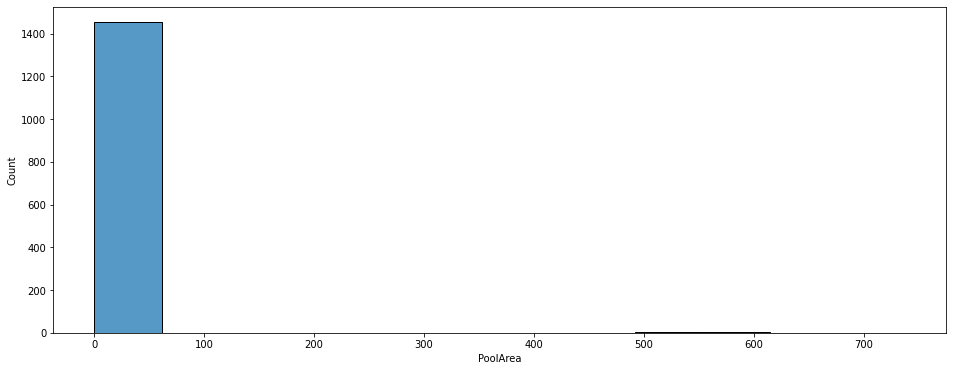

Kernel density estimation plot of PoolArea


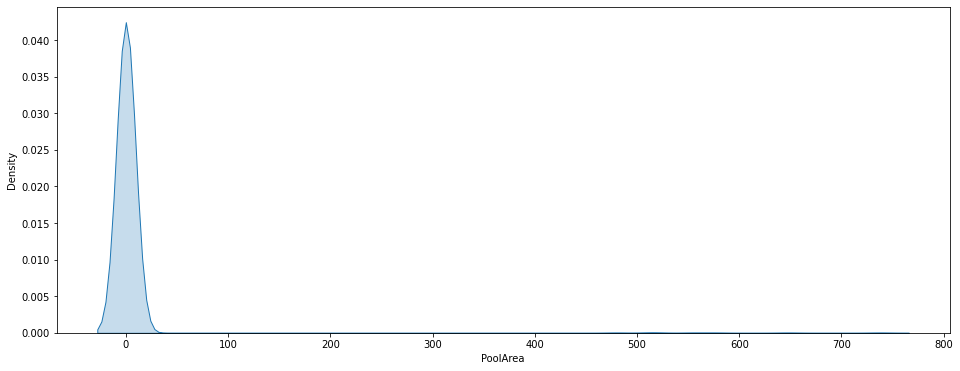

Box plot of PoolArea


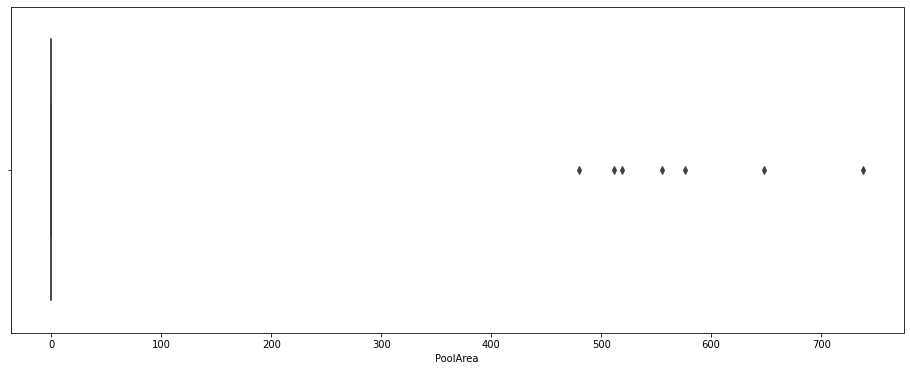

Description of MiscVal
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64 

Histogram of MiscVal


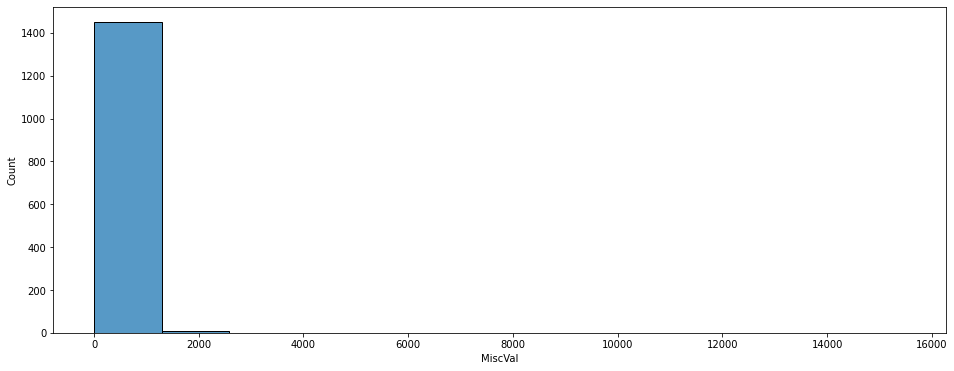

Kernel density estimation plot of MiscVal


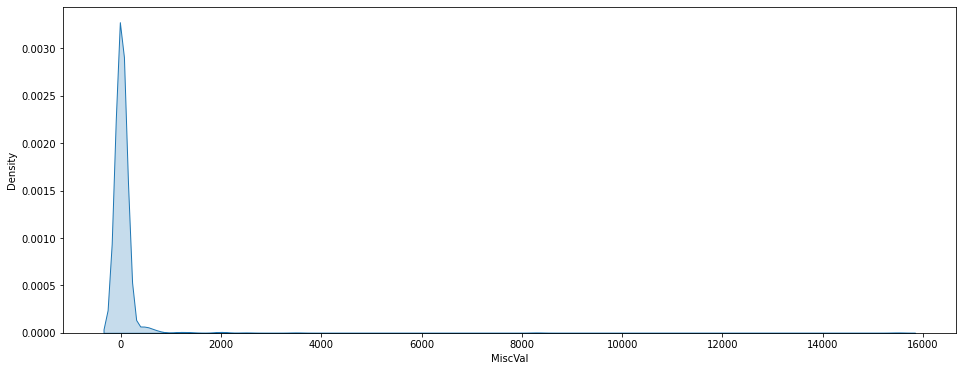

Box plot of MiscVal


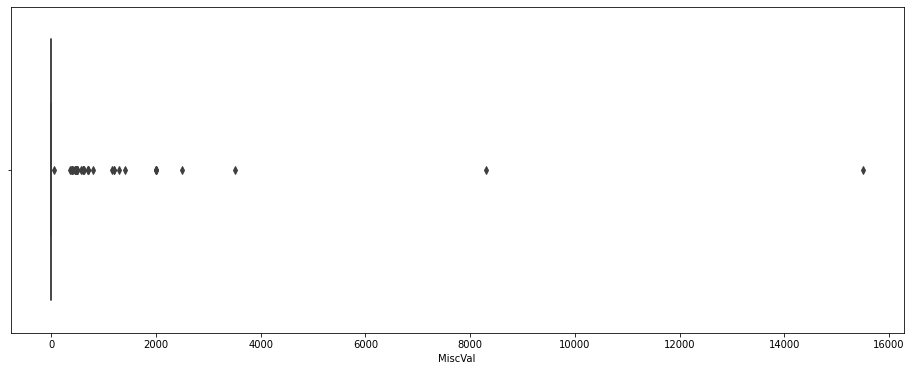

Description of MoSold
count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64 

Histogram of MoSold


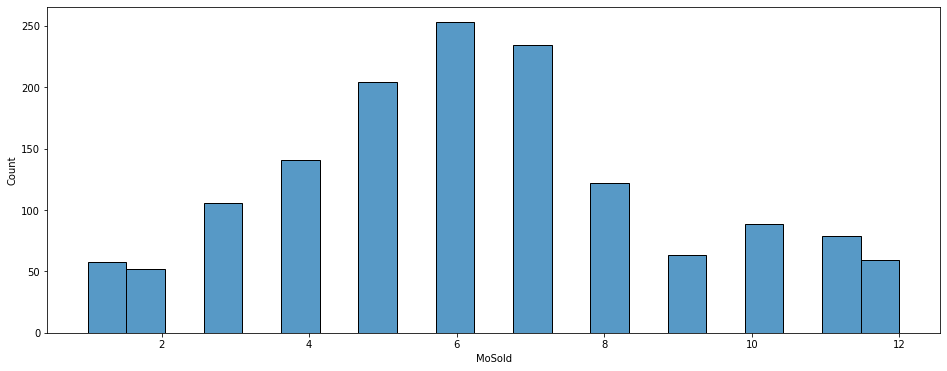

Kernel density estimation plot of MoSold


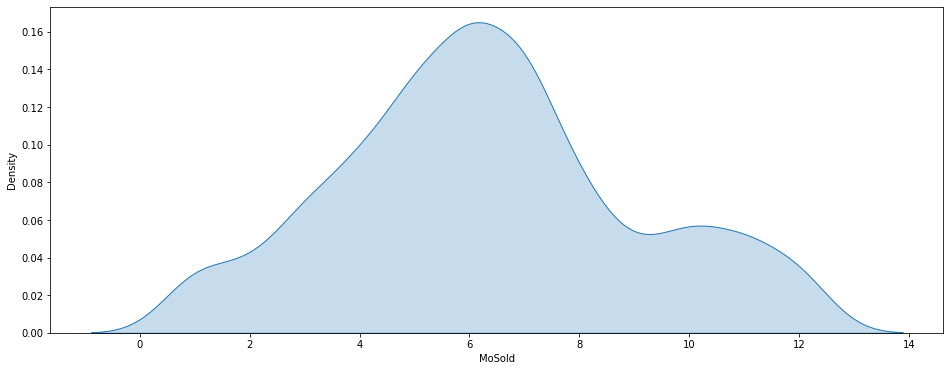

Box plot of MoSold


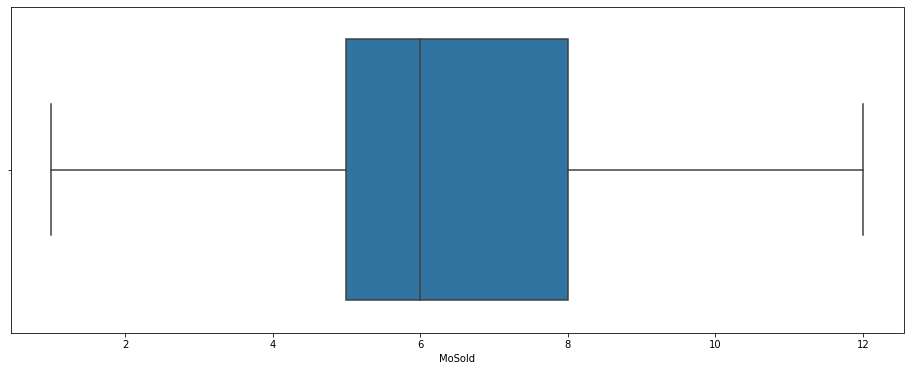

Description of YrSold
count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64 

Histogram of YrSold


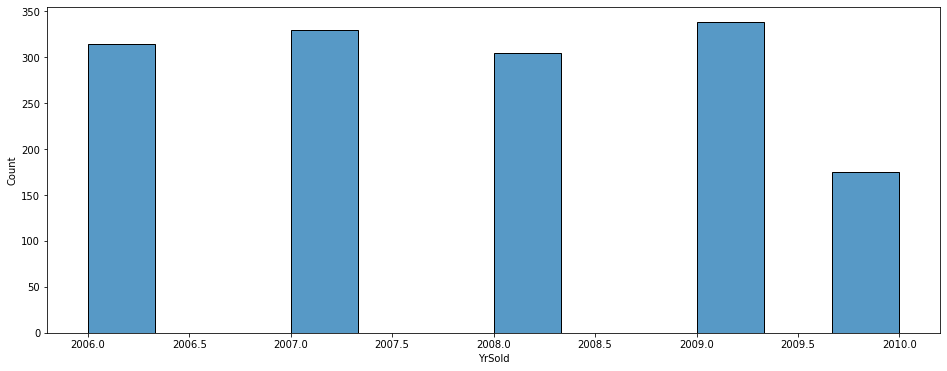

Kernel density estimation plot of YrSold


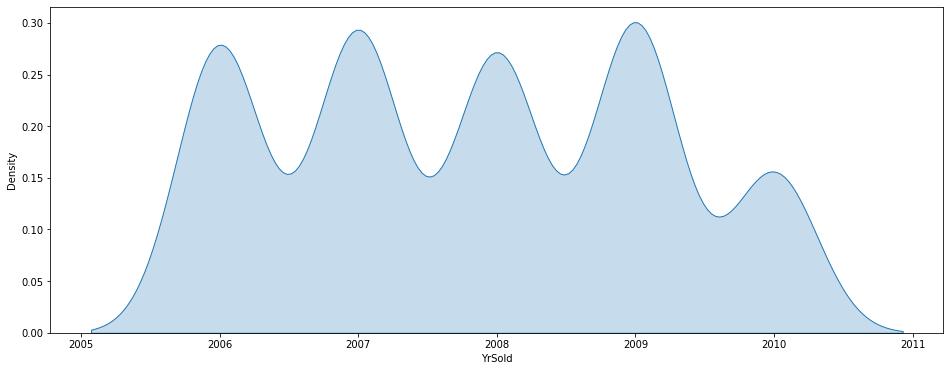

Box plot of YrSold


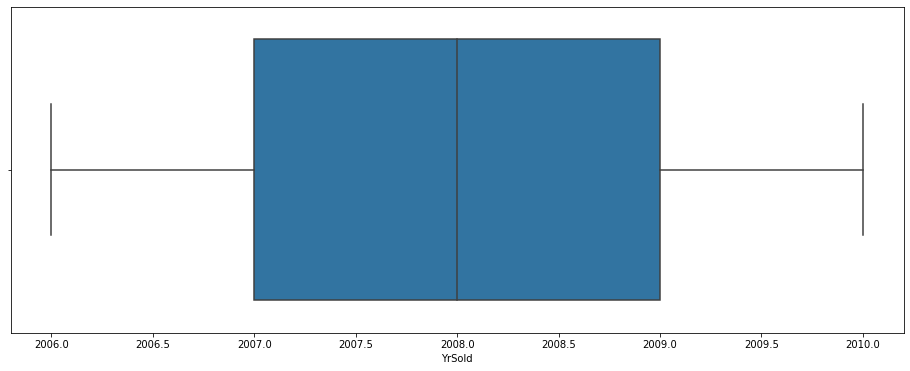

In [94]:
for feature in numerical_features:
    plot_numerical_feature(feature)

- "MasVnrArea": Area of the Masonry has a very strong right skewed distribution. More than 50% of houses doesn't have Masonries and this is evident on the graph. On the next page an analysis of Masonries without taking into account the 0 values is shown.
- "BsmtFinSF1": Area of the basement in square feet. More than 25% of houses doesn't have a basement> If a house has a basement then it is most probable that it has between 400 - 800 square feet.
- "BsmtFinSF2": Area of the second basement if a house has it. Above 75% of houses contains one or fewer basements. This variable requires separate analysis as shown below
- "BsmtUnfSF" and "TotalBsmtSF" have very similar distributions as two previous features, mostly right-skewed. "TotalBsmtSF" being the sum of different features has a distribution which is closer to normal one.
- "1stFlrSF" - most of the floor size is between 880 and 1400 square feet. Distribution is slightly right-skewed with few outliers
- "2ndFlrSF" - This variable needs special treatment to include only the houses which had a second floor. From statistics it is clear that more than half of houses in dataset had only a single floor.
- "LowQualFinSF" - need a special treatment as most values are equal to 0. This means that most houses have medium to high quality floors
- "GrLivArea" - highly normal distribution with little right skewness, no values are equal to 0.
- "BsmtFullBath": It is a numerical variable but it has so little possible values that it might be interesting to look at it from the categorical perspective (as seen below)
- "BsmtHalfBath": Same as above
- "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces","GarageCars" will be analysed below using bar charts and frequency tables.
- "GarageYrBuilt" has a strong correlation with the "HouseYrBuilt" (TODO: check that). Same three "bumps" in the histogram can be seen.
- "GarageArea": Around 80 houses don't have garages at all. The distribution for the rest has recognizable three elevations, which might be correlated with the year built (TODO: check that)
- "WoodDeckSF": most houses don't have Wood decks, so I will analyse those who have below
- "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal": same as above
- "MoSold" and "YrSold" are numerical variables but because of low cardinality they might be analysed as categorical variables. From the graphs it seems that number of sold houses is pretty stable among the years. The variables might be combined to include the overall variation in time. (TODO: combine year and month). In term of a month number of sold houses varies heavily with most of them are sold in spring and summer months, most in May, June and July.

Description of MasVnrArea
count     591.000000
mean      254.739425
std       205.144174
min         1.000000
25%       113.000000
50%       203.000000
75%       330.500000
max      1600.000000
Name: MasVnrArea, dtype: float64 

Histogram of MasVnrArea


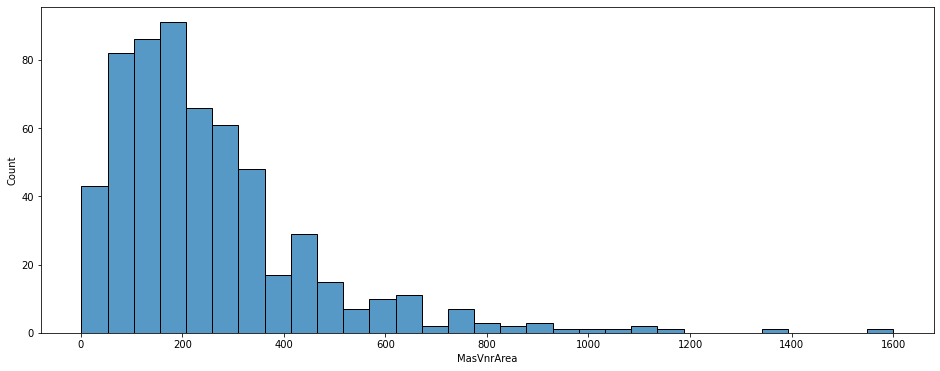

Kernel density estimation plot of MasVnrArea


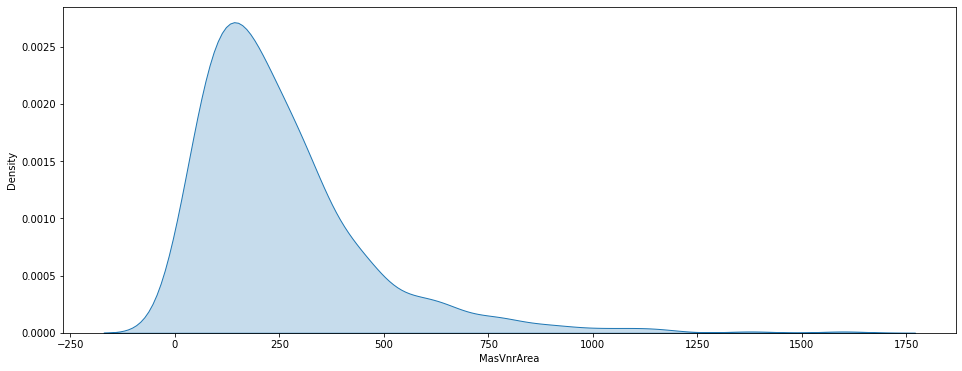

Box plot of MasVnrArea


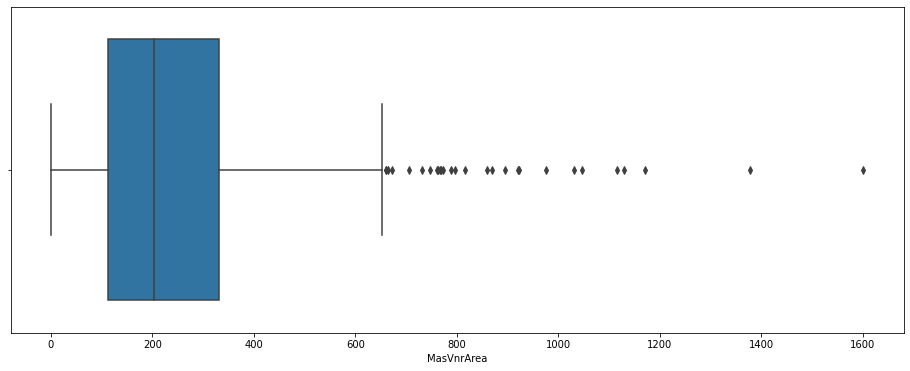

In [115]:
plot_numerical_feature("MasVnrArea", include_non_positive=False)

We see that if a house contains a Masonry, then it's most probable that it has area between 113 and 330 square feet. Distribution is right skewed but not as highly as in previous case (when including 0).

Description of BsmtFinSF1
count     993.000000
mean      652.279960
std       411.980316
min         2.000000
25%       371.000000
50%       604.000000
75%       867.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64 

Histogram of BsmtFinSF1


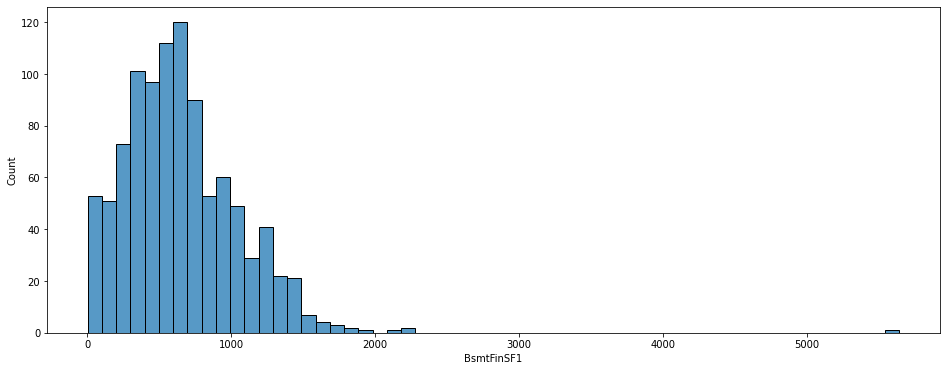

Kernel density estimation plot of BsmtFinSF1


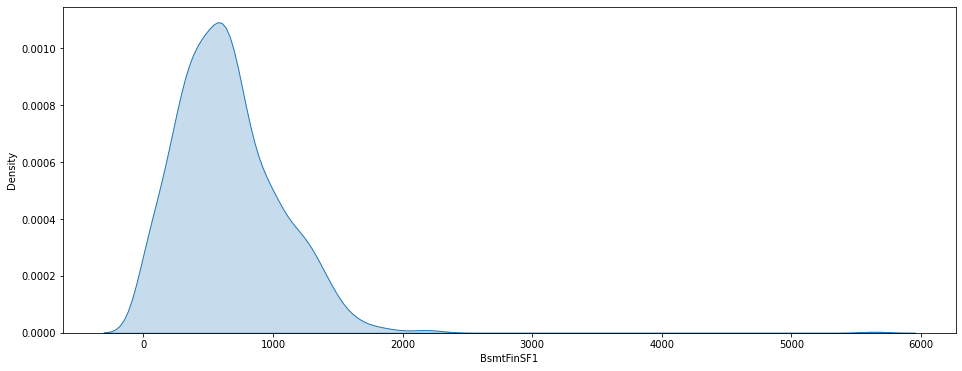

Box plot of BsmtFinSF1


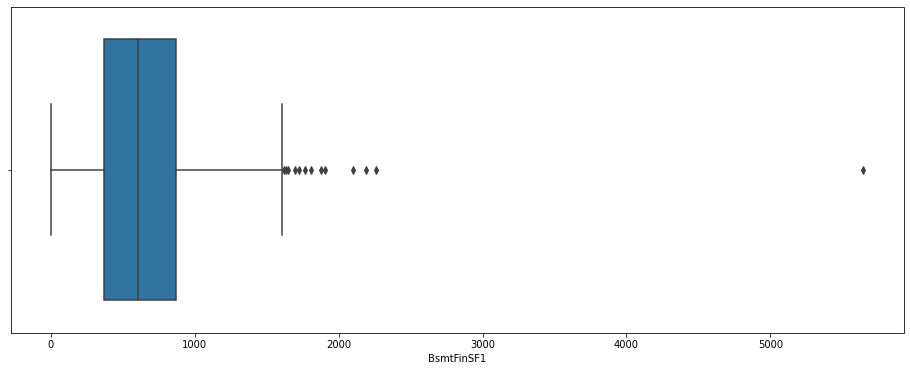

In [116]:
plot_numerical_feature("BsmtFinSF1", include_non_positive=False)

Description of BsmtFinSF2
count     167.000000
mean      406.958084
std       284.909420
min        28.000000
25%       178.500000
50%       354.000000
75%       551.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64 

Histogram of BsmtFinSF2


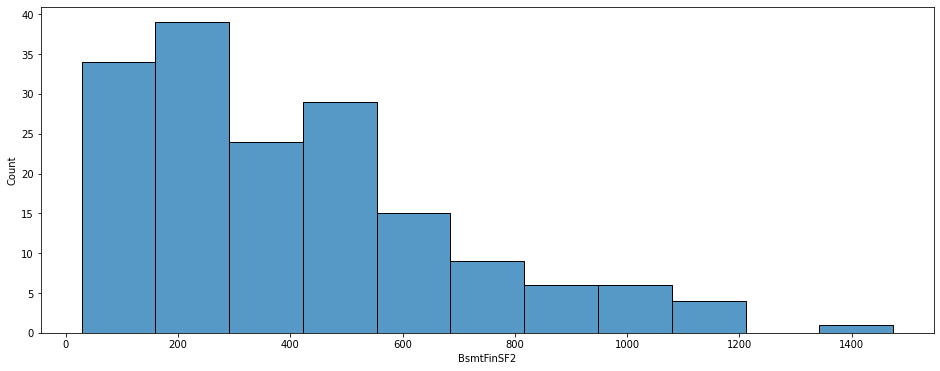

Kernel density estimation plot of BsmtFinSF2


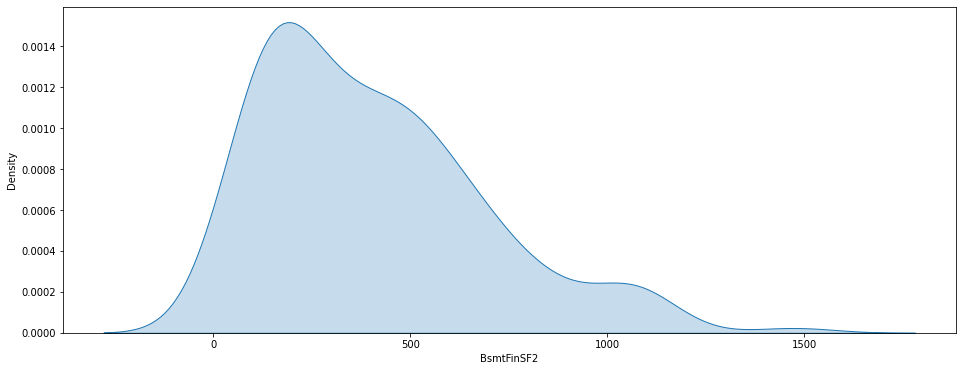

Box plot of BsmtFinSF2


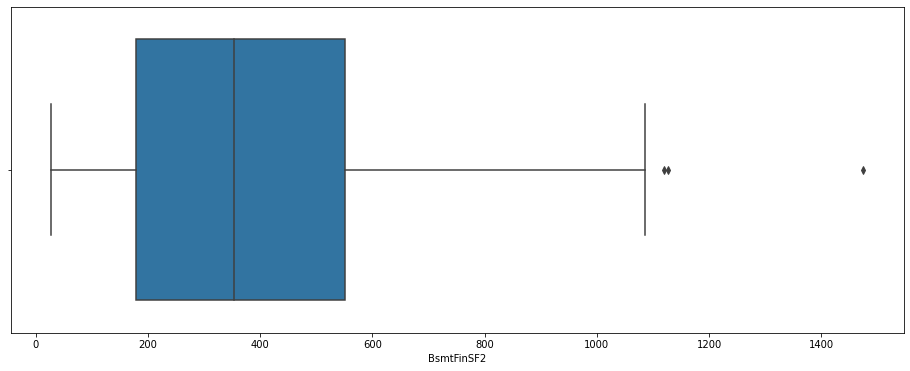

In [117]:
plot_numerical_feature("BsmtFinSF2", include_non_positive=False)

Both BsmtFinSF1 and BsmtFinSF2 have very similar distributions when observed on houses which have them. Distribution is again right skewed with few outliers.

Description of 2ndFlrSF
count     631.000000
mean      802.866878
std       273.346959
min       110.000000
25%       625.000000
50%       776.000000
75%       926.500000
max      2065.000000
Name: 2ndFlrSF, dtype: float64 

Histogram of 2ndFlrSF


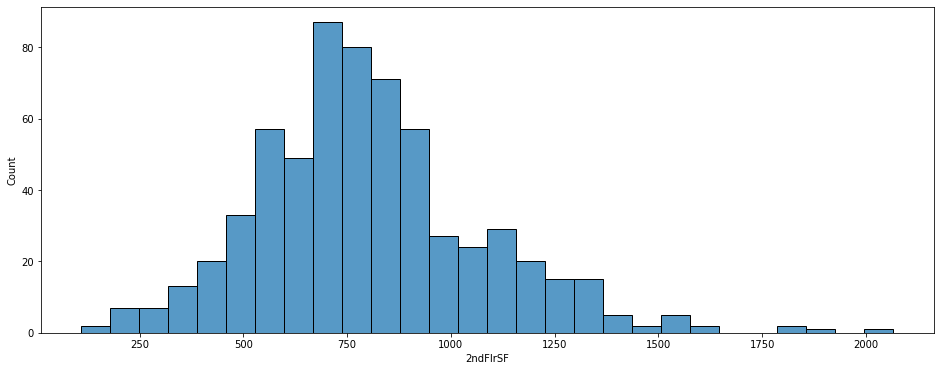

Kernel density estimation plot of 2ndFlrSF


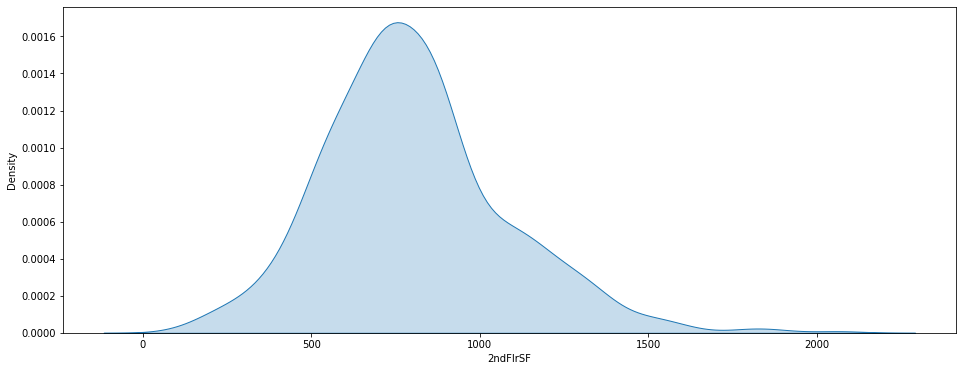

Box plot of 2ndFlrSF


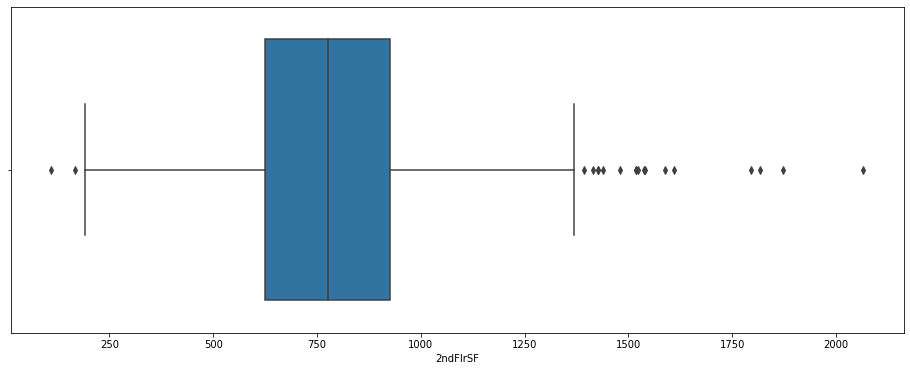

In [111]:
feature = "2ndFlrSF"
plot_numerical_feature(feature, include_non_positive=False)

From the plots and statistics it is clear that second basement is smaller than a first one with most probable values being from 620 to 930 square feet. Distribution is almost normal with few outliers.

Description of LowQualFinSF
count     26.000000
mean     328.192308
std      167.186128
min       53.000000
25%      168.250000
50%      377.500000
75%      477.500000
max      572.000000
Name: LowQualFinSF, dtype: float64 

Histogram of LowQualFinSF


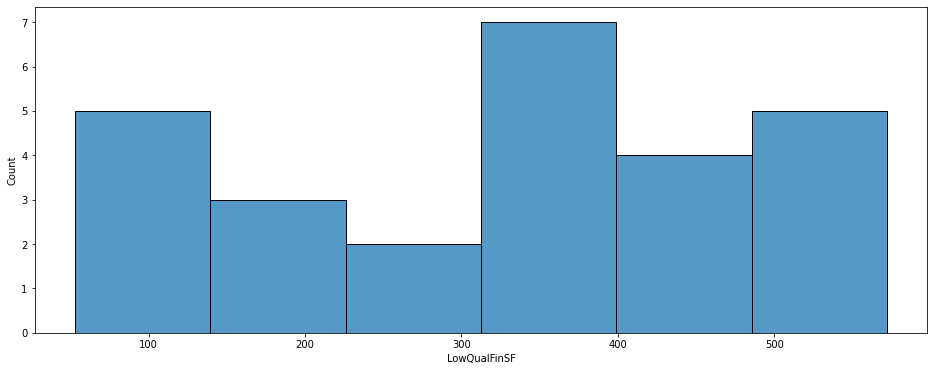

Kernel density estimation plot of LowQualFinSF


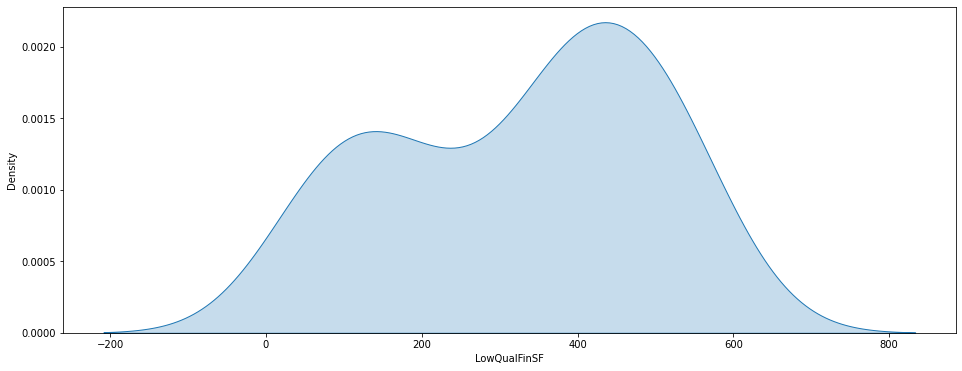

Box plot of LowQualFinSF


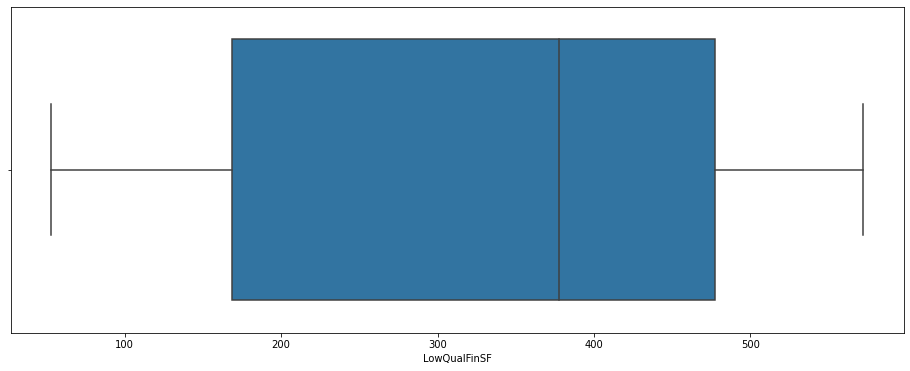

In [101]:
feature = "LowQualFinSF"
plot_numerical_feature(feature, include_non_positive=False)

There is so little data on LowQualFinSF that its distribution appears almost flat.

Total count: 1460
The frequency table:
0    0.586301
1    0.402740
2    0.010274
3    0.000685
Name: BsmtFullBath, dtype: float64 

Bar chart of BsmtFullBath


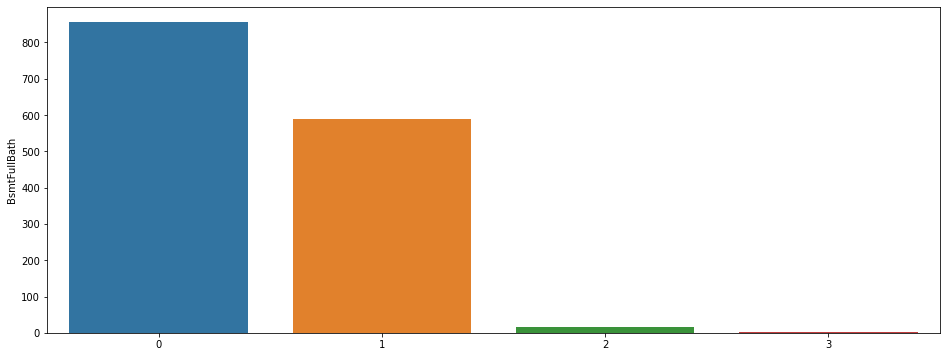

In [106]:
feature = "BsmtFullBath"
plot_categorical_feature(feature)

Most households have from 0 to 1 bathrooms in the basement, exceptional ones have 2 bathrooms. It appears that only one house had three bathrooms in the basement (as 1460 * 0.000685 = 1)

Total count: 1460
The frequency table:
0    0.943836
1    0.054795
2    0.001370
Name: BsmtHalfBath, dtype: float64 

Bar chart of BsmtHalfBath


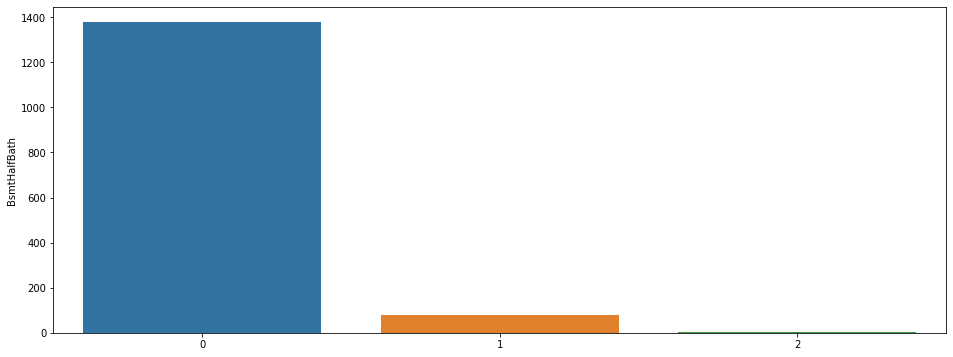

In [105]:
feature = "BsmtHalfBath"
plot_categorical_feature(feature)

This time number of bathrooms stayed below 3. The dominant value is lack of half-bathrooms with 95% frequency.

Next we're going to analyse the rest of low cardinality numerical variables:

Total count: 1460
The frequency table:
2    0.526027
1    0.445205
3    0.022603
0    0.006164
Name: FullBath, dtype: float64 

Bar chart of FullBath


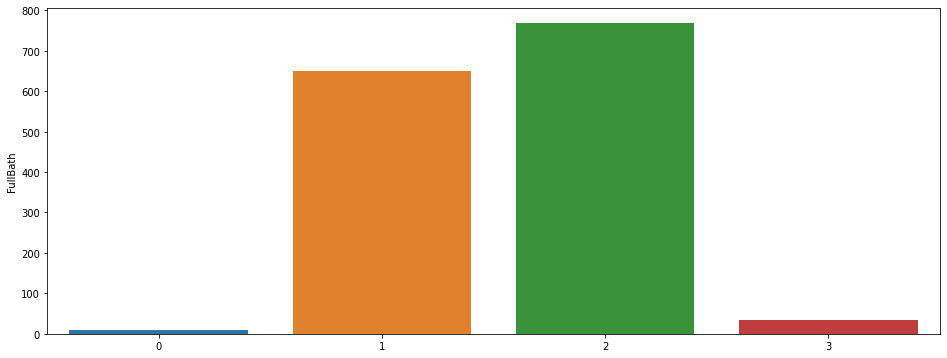

Total count: 1460
The frequency table:
0    0.625342
1    0.366438
2    0.008219
Name: HalfBath, dtype: float64 

Bar chart of HalfBath


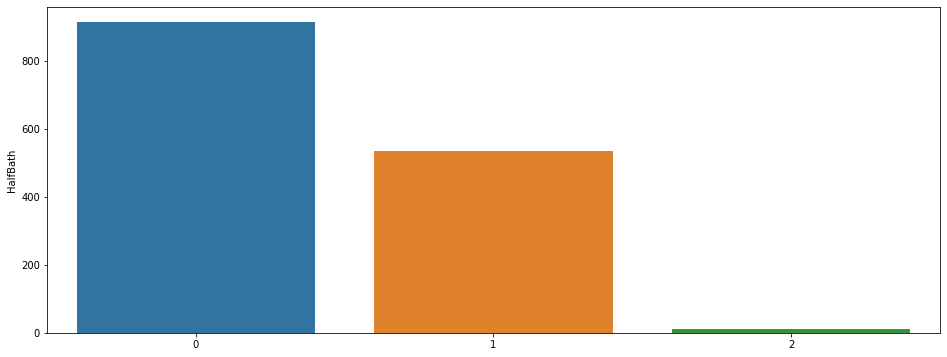

Total count: 1460
The frequency table:
3    0.550685
2    0.245205
4    0.145890
1    0.034247
5    0.014384
6    0.004795
0    0.004110
8    0.000685
Name: BedroomAbvGr, dtype: float64 

Bar chart of BedroomAbvGr


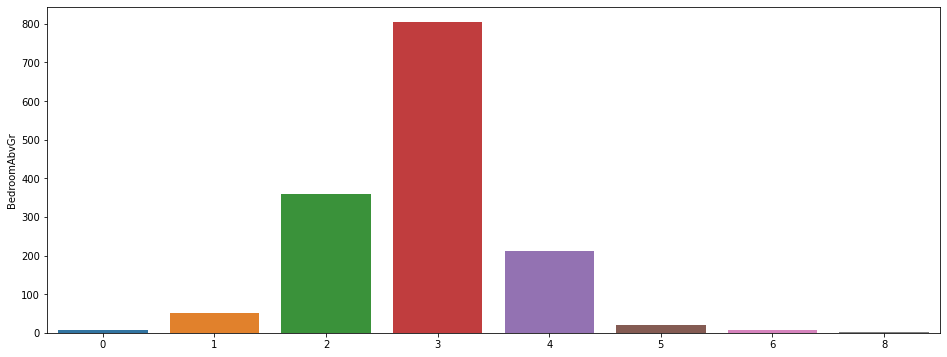

Total count: 1460
The frequency table:
1    0.953425
2    0.044521
3    0.001370
0    0.000685
Name: KitchenAbvGr, dtype: float64 

Bar chart of KitchenAbvGr


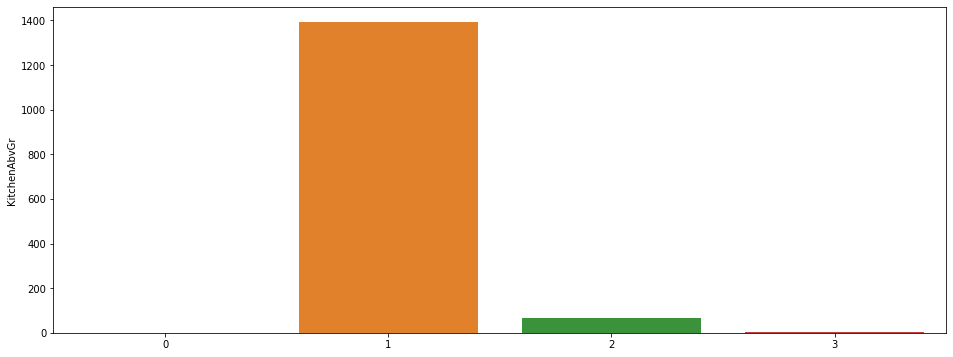

Total count: 1460
The frequency table:
6     0.275342
7     0.225342
5     0.188356
8     0.128082
4     0.066438
9     0.051370
10    0.032192
11    0.012329
3     0.011644
12    0.007534
2     0.000685
14    0.000685
Name: TotRmsAbvGrd, dtype: float64 

Bar chart of TotRmsAbvGrd


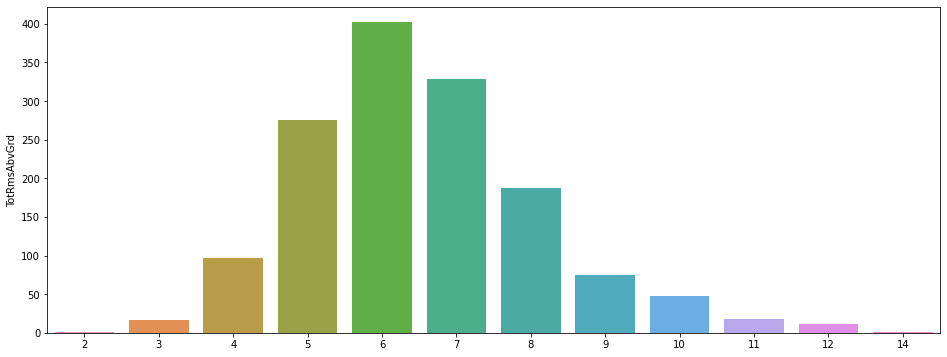

Total count: 1460
The frequency table:
0    0.472603
1    0.445205
2    0.078767
3    0.003425
Name: Fireplaces, dtype: float64 

Bar chart of Fireplaces


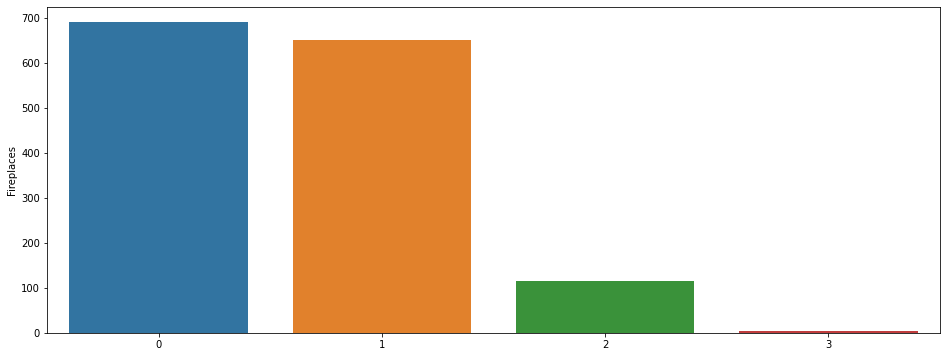

Total count: 1460
The frequency table:
2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: GarageCars, dtype: float64 

Bar chart of GarageCars


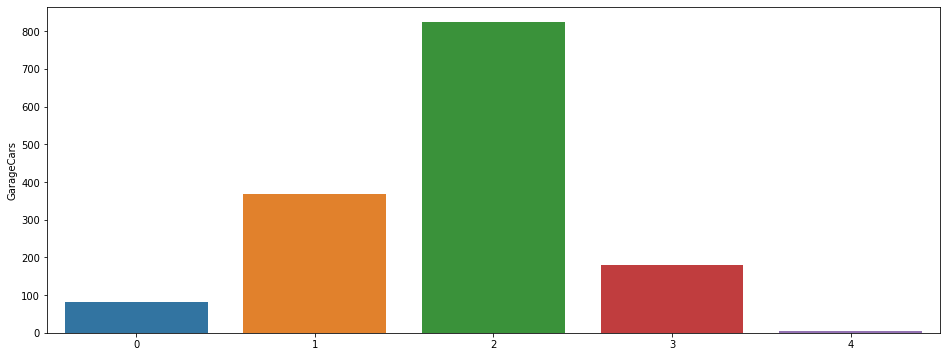

In [118]:
for feature in ["FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars"]:
    plot_categorical_feature(feature)

- "FullBath": distribution similar to basement bathrooms but shifted by one, with most houses having either one or two bathrooms. Having two of them seems to be more popular.
- "HalfBath" - 62% having 0 half bathrooms and 37% having one. The rest has two.
- "BedroomAbvGr": Most houses have three bedrooms with a pretty symmetric distribution
- "KitchenAbvGr": Most house have one kitchen
- "TotRmsAbvGrd": Most houses have 6 rooms above ground not counting the bathrooms. Distribution is slightly right-skewed
- "Fireplaces": Most houses have zero or one fireplace with frequency of 47% and 45% respectively. Rest has two or 3 fireplaces.
- "GarageCars": Most houses have space for 2 cars. Distribution is fairly symmetric.

Description of WoodDeckSF
count    699.000000
mean     196.848355
std      112.299729
min       12.000000
25%      120.000000
50%      171.000000
75%      240.000000
max      857.000000
Name: WoodDeckSF, dtype: float64 

Histogram of WoodDeckSF


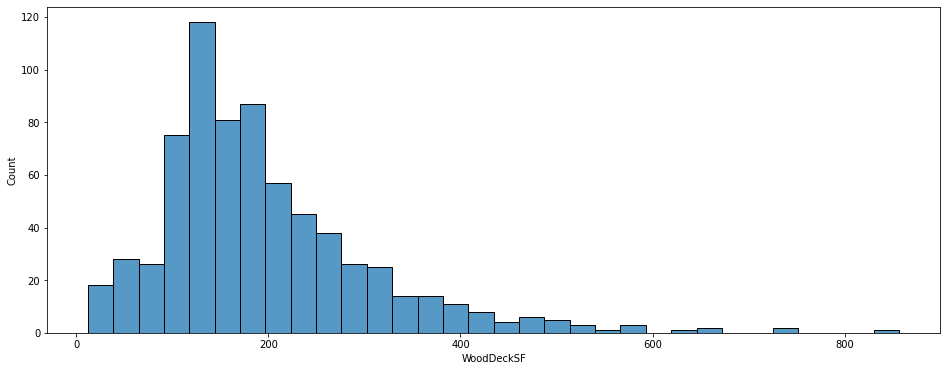

Kernel density estimation plot of WoodDeckSF


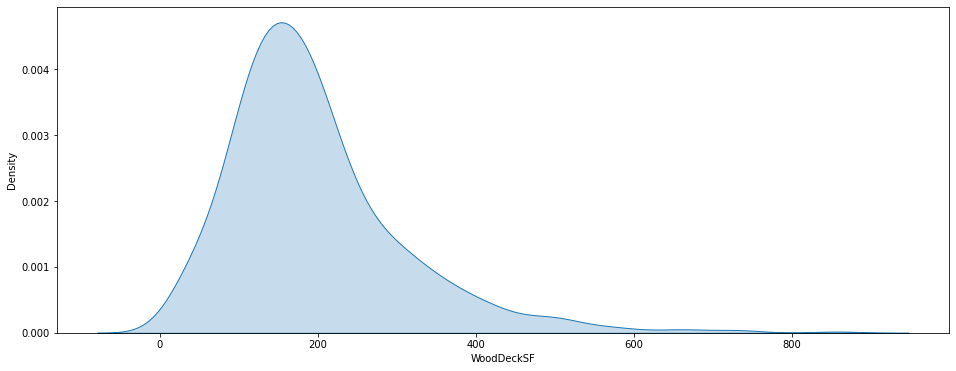

Box plot of WoodDeckSF


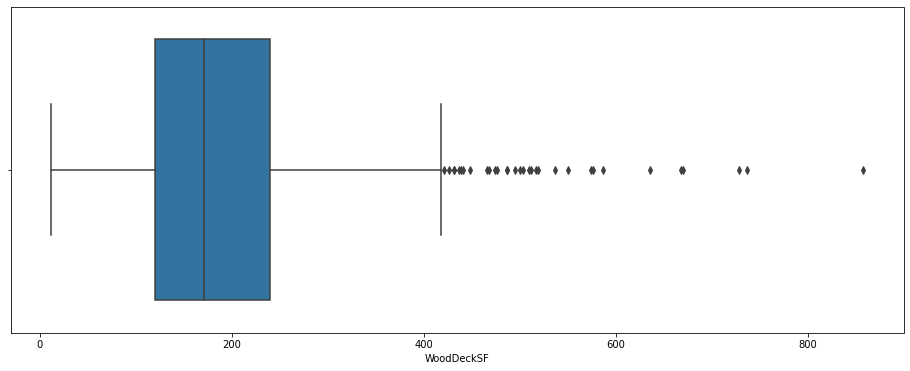

In [108]:
feature = "WoodDeckSF"
plot_numerical_feature(feature, include_non_positive=False)

After removing 0s distribution is right-skewed with a significant number of outliers.

Description of OpenPorchSF
count    804.000000
mean      84.731343
std       68.893171
min        4.000000
25%       39.000000
50%       63.000000
75%      112.000000
max      547.000000
Name: OpenPorchSF, dtype: float64 

Histogram of OpenPorchSF


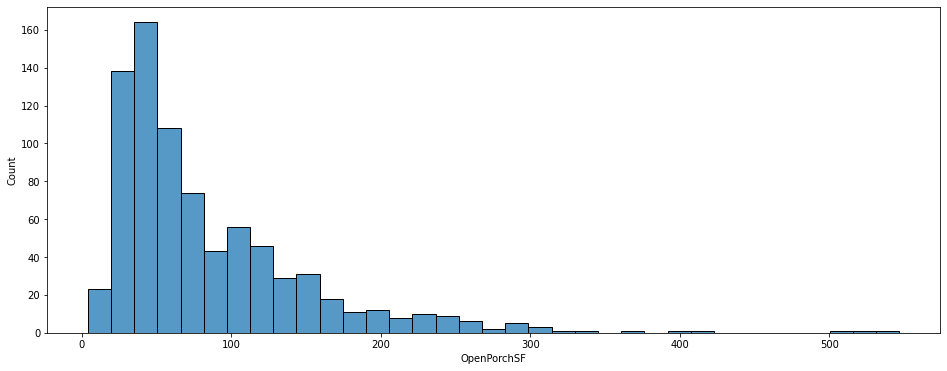

Kernel density estimation plot of OpenPorchSF


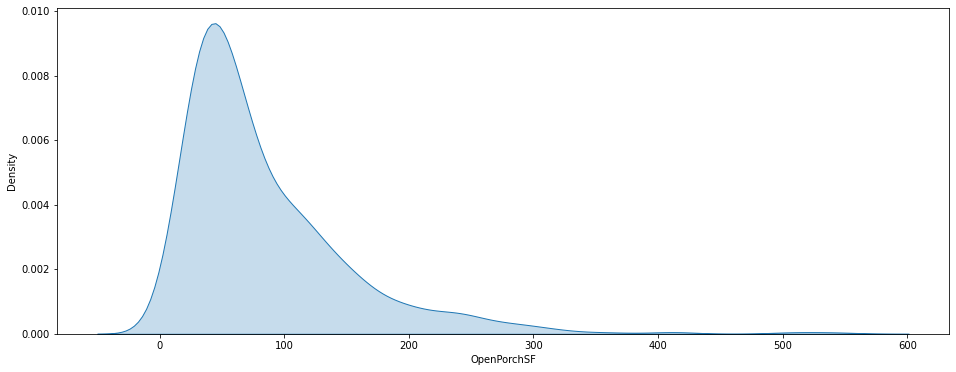

Box plot of OpenPorchSF


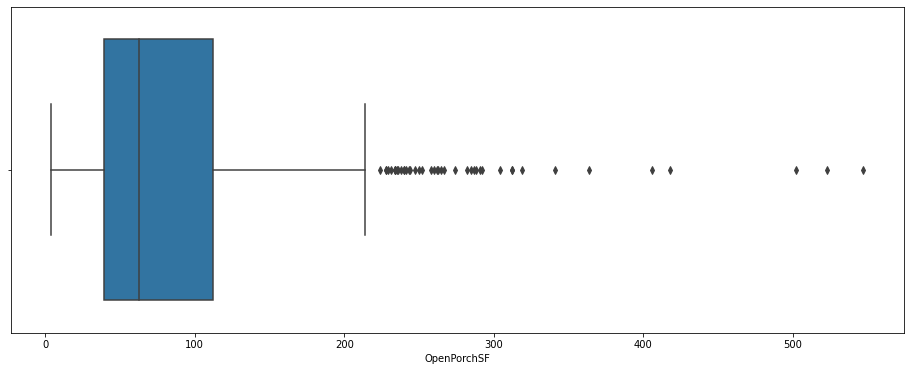

In [109]:
feature = "OpenPorchSF"
plot_numerical_feature(feature, include_non_positive=False)

Similar distribution to WoodDeckSF - right-skewed with significant number of outliers

Description of OpenPorchSF
count    804.000000
mean      84.731343
std       68.893171
min        4.000000
25%       39.000000
50%       63.000000
75%      112.000000
max      547.000000
Name: OpenPorchSF, dtype: float64 

Histogram of OpenPorchSF


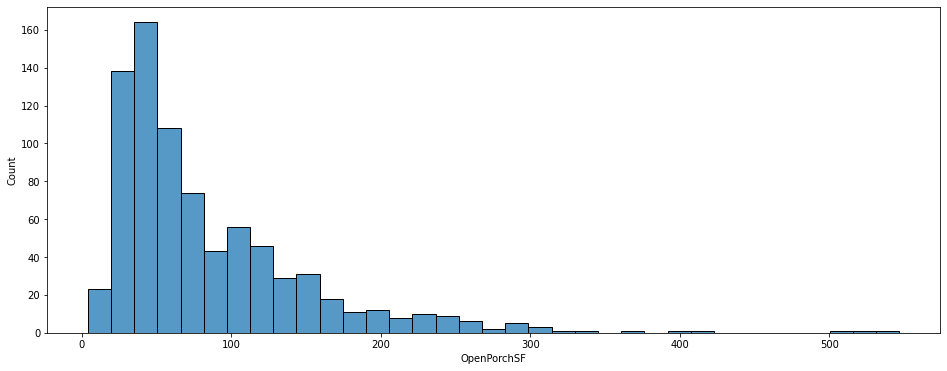

Kernel density estimation plot of OpenPorchSF


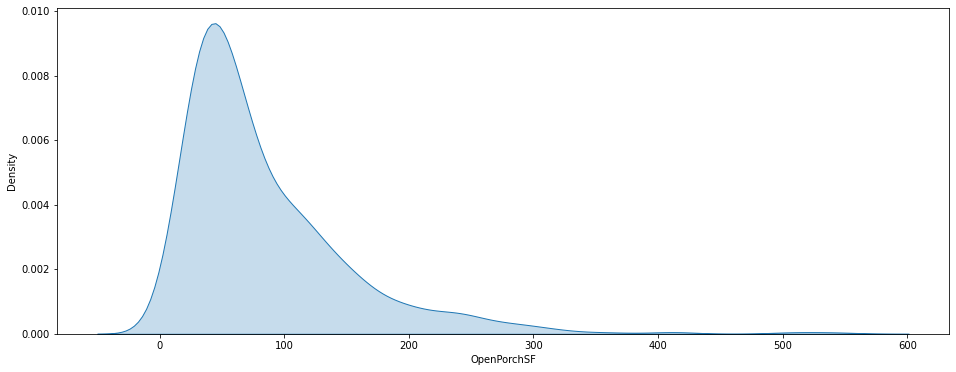

Box plot of OpenPorchSF


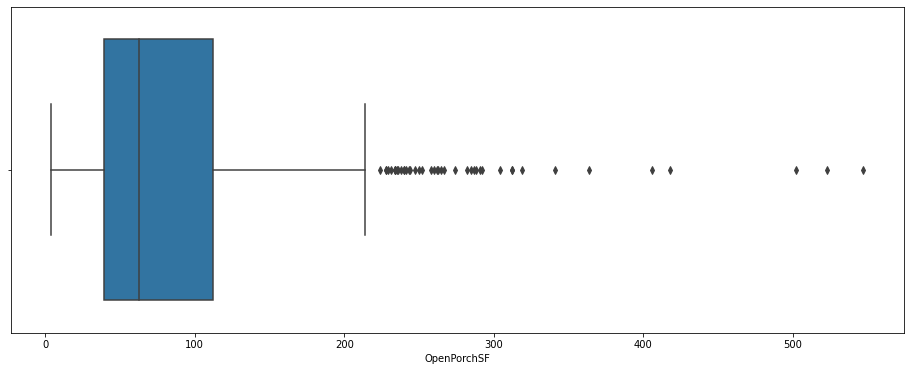

Description of EnclosedPorch
count    208.000000
mean     154.100962
std       76.596215
min       19.000000
25%      104.250000
50%      144.500000
75%      205.000000
max      552.000000
Name: EnclosedPorch, dtype: float64 

Histogram of EnclosedPorch


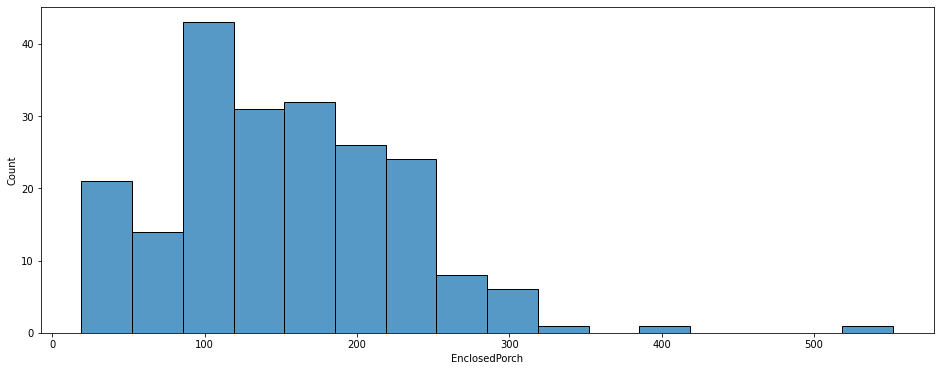

Kernel density estimation plot of EnclosedPorch


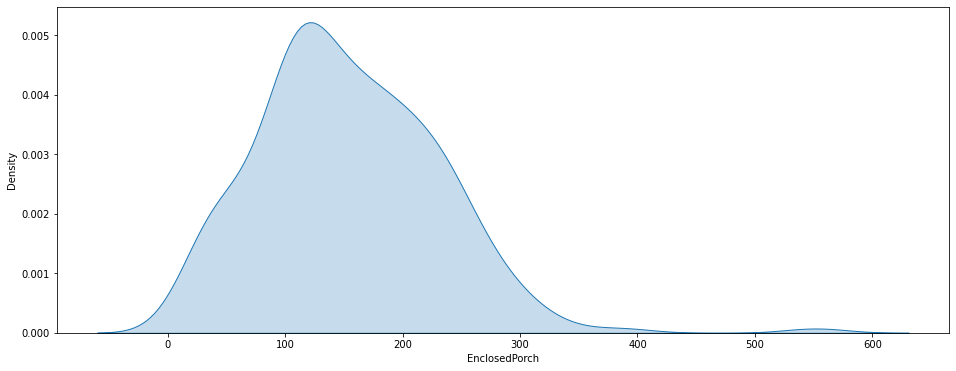

Box plot of EnclosedPorch


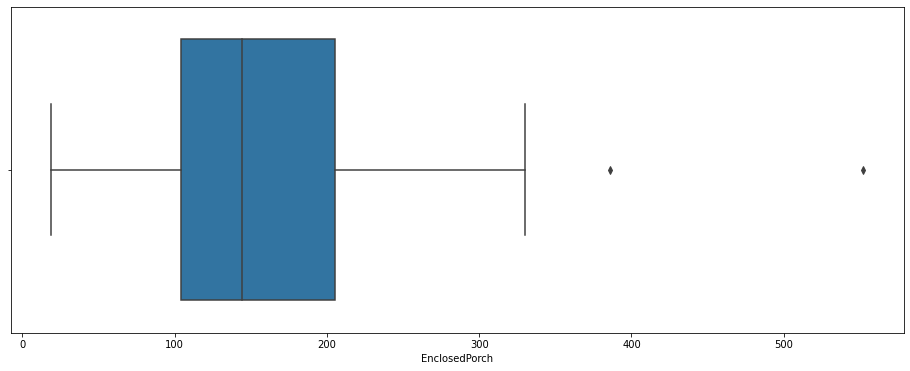

Description of 3SsnPorch
count     24.000000
mean     207.416667
std      101.825049
min       23.000000
25%      150.750000
50%      180.000000
75%      239.750000
max      508.000000
Name: 3SsnPorch, dtype: float64 

Histogram of 3SsnPorch


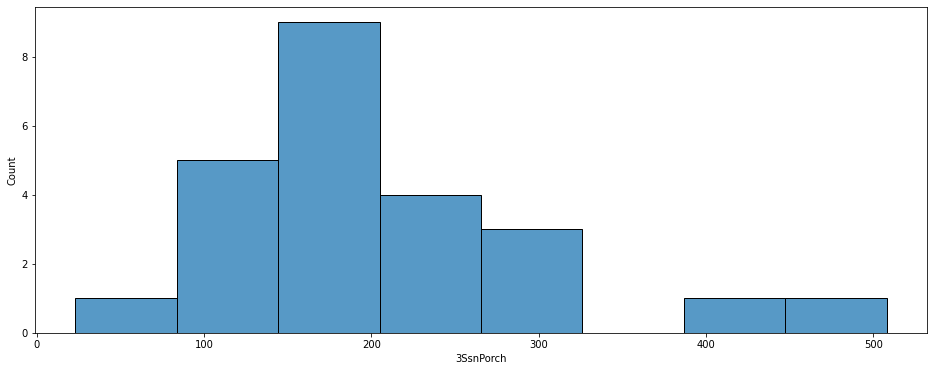

Kernel density estimation plot of 3SsnPorch


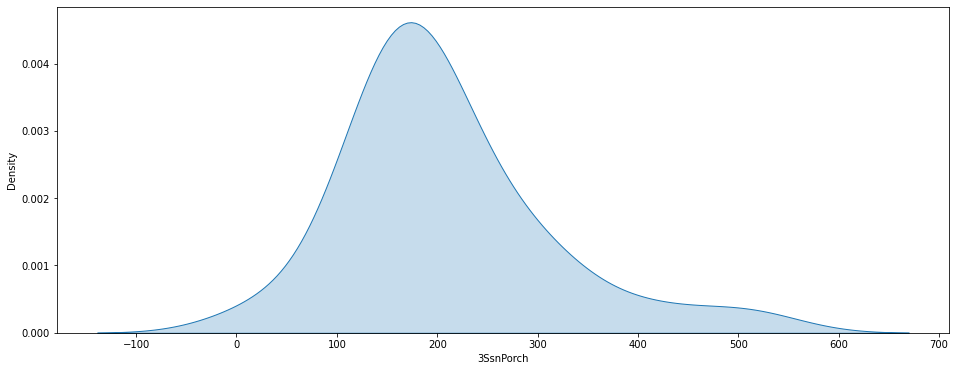

Box plot of 3SsnPorch


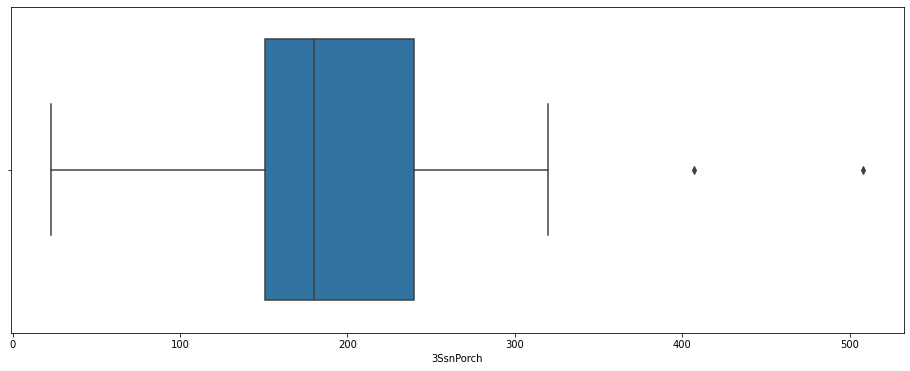

Description of ScreenPorch
count    116.000000
mean     189.560345
std       77.952191
min       40.000000
25%      143.750000
50%      180.000000
75%      224.000000
max      480.000000
Name: ScreenPorch, dtype: float64 

Histogram of ScreenPorch


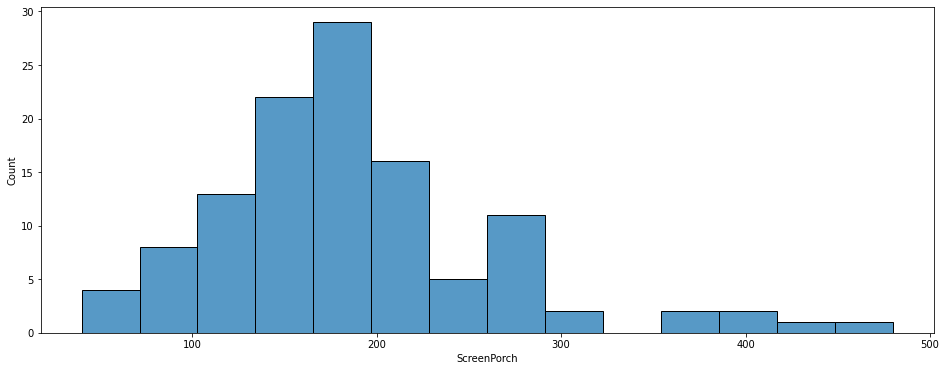

Kernel density estimation plot of ScreenPorch


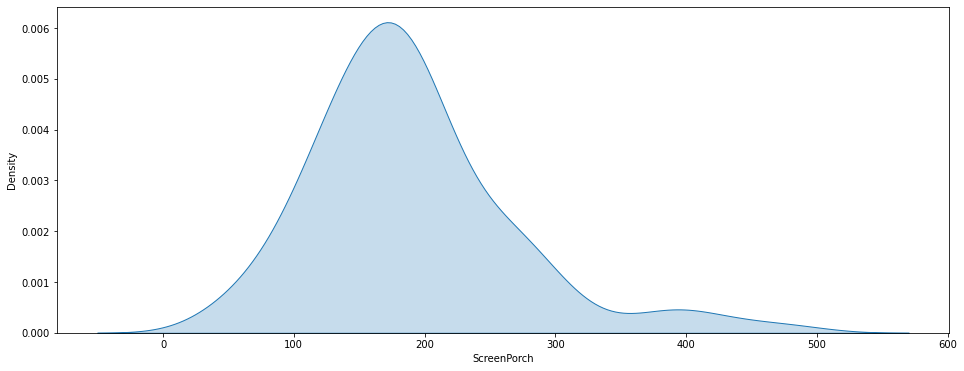

Box plot of ScreenPorch


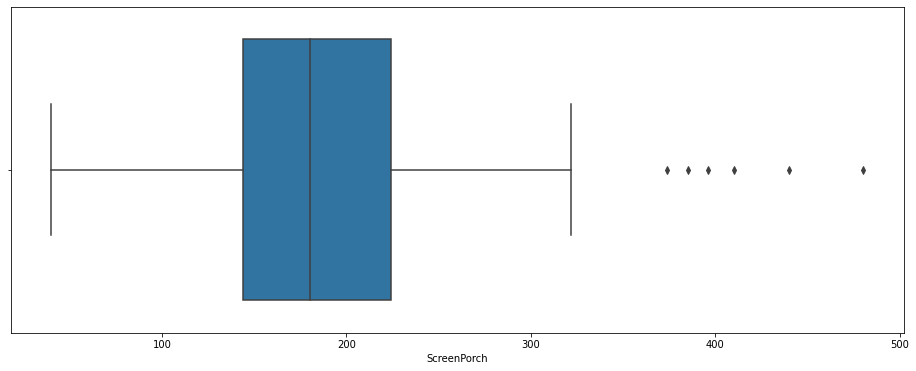

Description of PoolArea
count      7.000000
mean     575.428571
std       89.840335
min      480.000000
25%      515.500000
50%      555.000000
75%      612.000000
max      738.000000
Name: PoolArea, dtype: float64 

Histogram of PoolArea


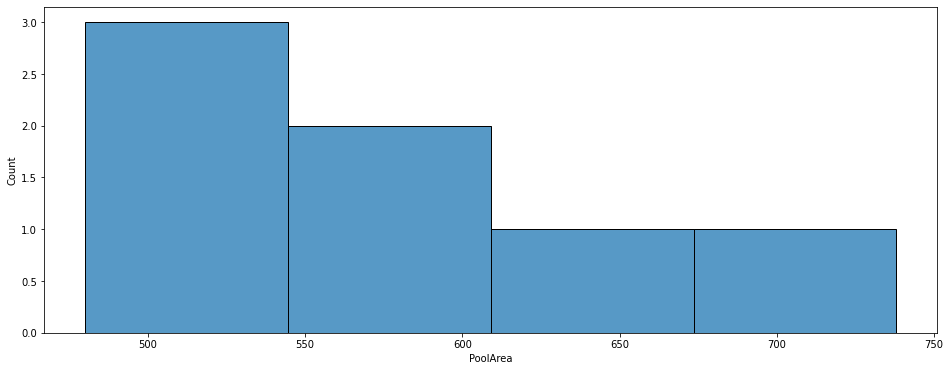

Kernel density estimation plot of PoolArea


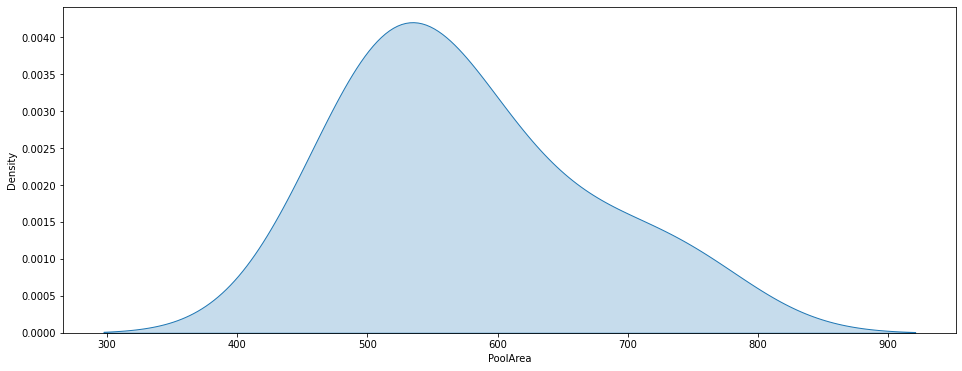

Box plot of PoolArea


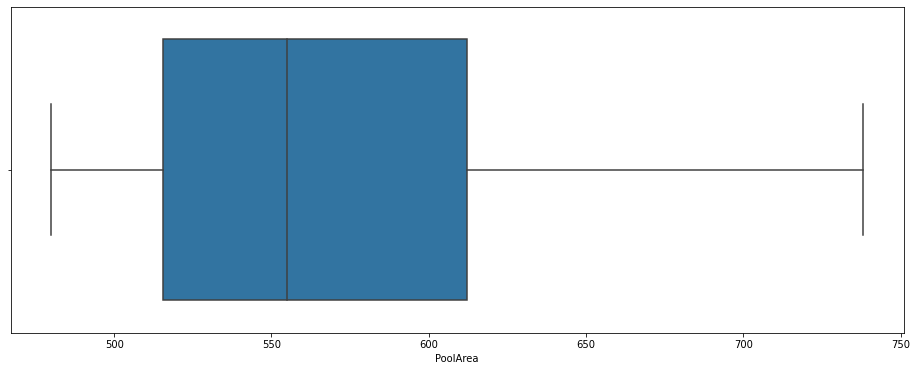

Description of MiscVal
count       52.000000
mean      1221.038462
std       2361.239704
min         54.000000
25%        437.500000
50%        500.000000
75%        887.500000
max      15500.000000
Name: MiscVal, dtype: float64 

Histogram of MiscVal


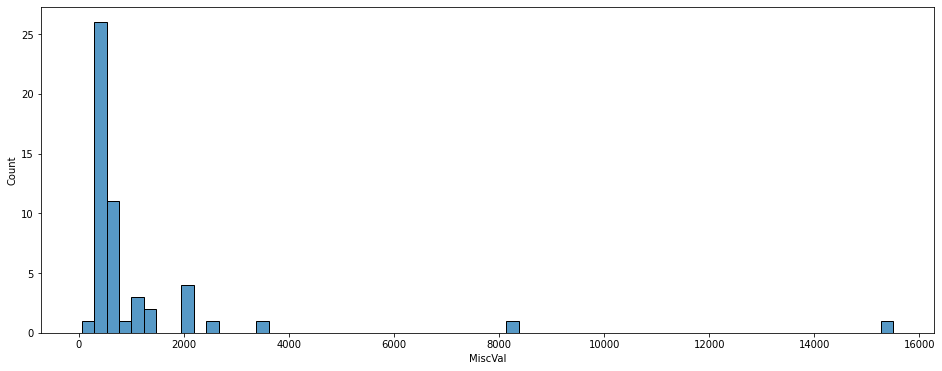

Kernel density estimation plot of MiscVal


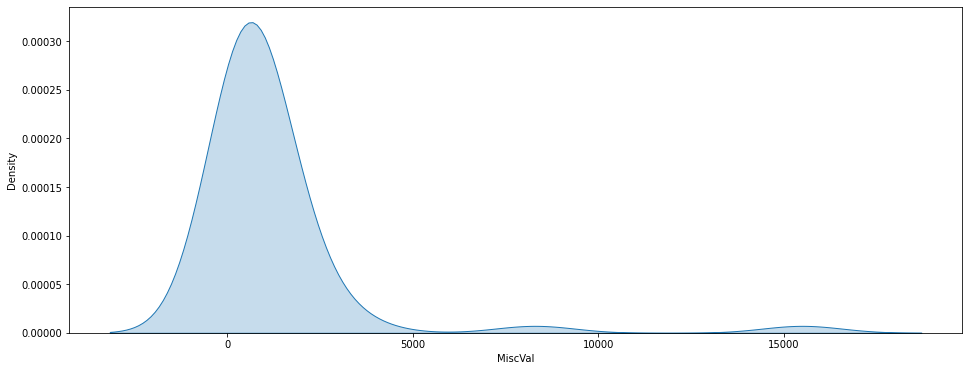

Box plot of MiscVal


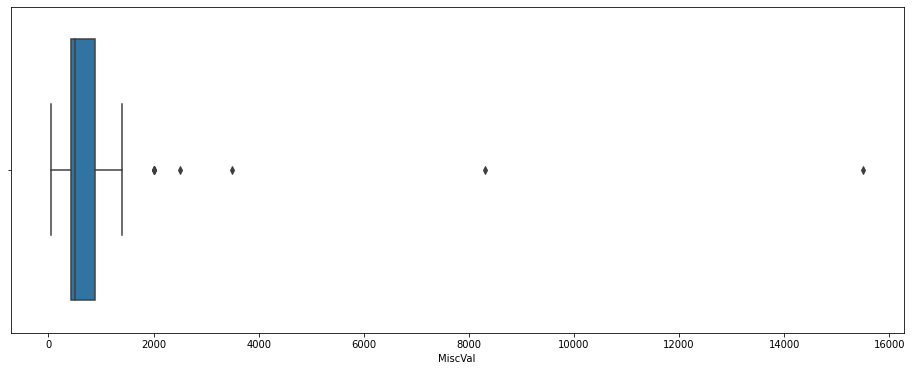

In [112]:
for feature in ["OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]:
    plot_numerical_feature(feature, include_non_positive=False)

- "OpenPorchSF" has a right-skewed distribution, with significant number of outliers
- "EnclosedPorch" what is surprising has a reasonably normal distribution with low number of outliers
- "3SsnPorch", "ScreenPorch" - similar cases as above
- "PoolArea": there are only 7 houses with a pool in the dataset. it seems distribution is right skewed but it's difficult to say because of low number of observations
- "MiscVal": Most miscellaneous features have value less than 1000 dollars but with some exceptions up to 15500 dollars